# 3-parameter interpolation for two-qubit Cartan coordinates

In [1]:
import random
import sys,io
from scipy.spatial import Delaunay
from qctrl_optimize import hamiltonians
from qctrl_optimize import optimize as opt
from qctrl_optimize import gates
from qctrl_optimize import simulate as sim
from qctrl_optimize import interpolate as interp
from qctrl_optimize import plot as plotter
from qctrl import Qctrl
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pickle
from itertools import product
qctrl = Qctrl()

In [2]:
# Set up parameters for the Interpolater

num_pwc_segments = 10
segment_count = 500
duration = np.pi
sample_times = np.linspace(0, duration, segment_count)
amplitude=1
tik0 = 1e-2
tik0 = tik0 / (amplitude**2 * num_pwc_segments)
seed = 1 # reproducability
random.seed(seed)

def in_weyl(pts):
    return (1 >= pts[:,0]) * (np.minimum(pts[:,0], 1-pts[:,0]) >= pts[:,1]) * (pts[:,1] >= pts[:,2]) * (pts[:,2] >= 0)

# get sets of reference points and testing points
def get_points(granularity):
    npts = int(1+1/granularity)
    points = np.array(list(product(np.linspace(0,1,npts), np.linspace(0,1,npts), np.linspace(0,1,npts))))
    return points
granularity_train = 1/4
granularity_test = 1/12
train_points = get_points(granularity_train)
test_points = get_points(granularity_test)

# function mapping pulse signals to Hamiltonian
def sigs_to_ham(graph, signals):
    hamiltonian, _,_,= hamiltonians.simple_hamiltonian_from_signals(graph, signals)
    return hamiltonian

# function mapping (graph, target, signals) => graph.infidelity
infid_func = opt.get_ham_infid_func(sigs_to_ham)

var_shape = (hamiltonians.SIMPLE_HAM_N_SIG, num_pwc_segments)
# function mapping pulse optimizable variables to signal objects
vals_to_sigs = opt.get_vals_to_sigs_pwc(duration, var_shape, amplitude)

In [3]:
from_scratch = True
num_optimization_rounds = 6

result_dicts = []

In [4]:
if from_scratch:
    interpolater = interp.Interpolater(qctrl, gates.weyl, tik0, interp.neighbor_avg, seed, infid_func, vals_to_sigs)
    
    opt_var_results = None
    for iter in range(num_optimization_rounds):
        if from_scratch:
            if iter > 0:
                train_points, opt_var_results = interp.sort_points_by_tik(train_points, opt_var_results)
            opt_var_results, n_iters = interpolater.train(train_points, first_run=(iter == 0), all_opt_var_results=opt_var_results, max_iter=50)
            infids, simplices, _, _ = interpolater.test_interpolations(train_points, opt_var_results, test_points)
            result_dict = {'train_points':train_points, 'test_points':test_points, 'infids':infids, 'simplices':simplices, 'n_iters':n_iters, 'opt_var_results':opt_var_results}
            pickle.dump(result_dict, open(f'interpolation_results/cartan/result_dict_full_{iter}.pkl', 'wb'))
            result_dicts.append(result_dict)
else:
    result_dicts += [pickle.load(open(f'interpolation_results/cartan/result_dict_full_{iter}.pkl', 'rb')) for iter in range(num_optimization_rounds)]

[0. 0. 0.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676433") has completed.
Iterations:	51
Optimized cost:	2.197e-03
Infidelity:	4.484e-05
Tikhonov:	2.152e-03
1 [[-0.41148676 -0.37120739 -0.58682947 -0.29529747 -0.35313307 -0.79780485
  -0.08488061 -0.28702166 -0.79515643 -0.37805606]
 [-0.03291825  0.00828239  0.10764892 -0.03652549  0.00959541 -0.10649246
   0.01810194  0.04597744  0.05951483 -0.0663435 ]
 [ 0.1152876   0.07050063 -0.07344664 -0.03238389  0.01798141  0.02792486
  -0.07568275  0.1413628  -0.08349488 -0.09988974]
 [ 0.89526121  0.90725796  0.86585582  0.82512299  0.734586    0.78731132
   0.98214132  0.79390853  0.82900351  0.87585626]
 [-0.40803616 -0.19972227 -0.17021223 -0.39488887 -0.40800376 -0.24750005
  -0.30502259 -0.16241682 -0.3578515  -0.40353916]]
[0.   0.   0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676434") has completed.
Iterations:	51
Optimized cost:	2.197e-03
Infidelity:	4.484e-05
Tikhonov:	2.152e-03
[0.  0.  0.5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676435") has completed.
Iterations:	51
Optimized cost:	2.197e-03
Infidelity:	4.484e-05
Tikhonov:	2.152e-03
[0.   0.   0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676436") has completed.
Iterations:	51
Optimized cost:	2.197e-03
Infidelity:	4.484e-05
Tikhonov:	2.152e-03
[0. 0. 1.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676437") has completed.
Iterations:	51
Optimized cost:	2.197e-03
Infidelity:	4.484e-05
Tikhonov:	2.152e-03
[0.   0.25 0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676438") has completed.
Iterations:	50
Optimized cost:	3.543e-03
Infidelity:	1.602e-04
Tikhonov:	3.383e-03
[0.   0.25 0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676439") has completed.
Iterations:	50
Optimized cost:	3.543e-03
Infidelity:	1.602e-04
Tikhonov:	3.383e-03
[0.   0.25 0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676440") has completed.
Iterations:	50
Optimized cost:	3.543e-03
Infidelity:	1.602e-04
Tikhonov:	3.383e-03
[0.   0.25 0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676441") has completed.
Iterations:	50
Optimized cost:	3.543e-03
Infidelity:	1.602e-04
Tikhonov:	3.383e-03
[0.   0.25 1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676442") has completed.
Iterations:	50
Optimized cost:	3.543e-03
Infidelity:	1.602e-04
Tikhonov:	3.383e-03
[0.  0.5 0. ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676443") has completed.
Iterations:	50
Optimized cost:	4.409e-03
Infidelity:	1.006e-05
Tikhonov:	4.399e-03
[0.   0.5  0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676444") has completed.
Iterations:	50
Optimized cost:	4.409e-03
Infidelity:	1.006e-05
Tikhonov:	4.399e-03
[0.  0.5 0.5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676445") has completed.
Iterations:	50
Optimized cost:	4.409e-03
Infidelity:	1.006e-05
Tikhonov:	4.399e-03
[0.   0.5  0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676446") has completed.
Iterations:	50
Optimized cost:	4.409e-03
Infidelity:	1.006e-05
Tikhonov:	4.399e-03
[0.  0.5 1. ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676447") has completed.
Iterations:	50
Optimized cost:	4.409e-03
Infidelity:	1.006e-05
Tikhonov:	4.399e-03
[0.   0.75 0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676448") has completed.
Iterations:	50
Optimized cost:	3.765e-03
Infidelity:	1.180e-05
Tikhonov:	3.753e-03
[0.   0.75 0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676449") has completed.
Iterations:	50
Optimized cost:	3.765e-03
Infidelity:	1.180e-05
Tikhonov:	3.753e-03
[0.   0.75 0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676450") has completed.
Iterations:	50
Optimized cost:	3.765e-03
Infidelity:	1.180e-05
Tikhonov:	3.753e-03
[0.   0.75 0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676451") has completed.
Iterations:	50
Optimized cost:	3.765e-03
Infidelity:	1.180e-05
Tikhonov:	3.753e-03
[0.   0.75 1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676452") has completed.
Iterations:	50
Optimized cost:	3.765e-03
Infidelity:	1.180e-05
Tikhonov:	3.753e-03
[0. 1. 0.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676453") has completed.
Iterations:	50
Optimized cost:	1.210e-03
Infidelity:	7.341e-06
Tikhonov:	1.203e-03
[0.   1.   0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676454") has completed.
Iterations:	50
Optimized cost:	1.210e-03
Infidelity:	7.341e-06
Tikhonov:	1.203e-03
[0.  1.  0.5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676455") has completed.
Iterations:	50
Optimized cost:	1.210e-03
Infidelity:	7.341e-06
Tikhonov:	1.203e-03
[0.   1.   0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676456") has completed.
Iterations:	50
Optimized cost:	1.210e-03
Infidelity:	7.341e-06
Tikhonov:	1.203e-03
[0. 1. 1.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676457") has completed.
Iterations:	50
Optimized cost:	1.210e-03
Infidelity:	7.341e-06
Tikhonov:	1.203e-03
[0.25 0.   0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676458") has completed.
Iterations:	50
Optimized cost:	1.798e-03
Infidelity:	1.169e-05
Tikhonov:	1.786e-03
[0.25 0.   0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676459") has completed.
Iterations:	50
Optimized cost:	1.798e-03
Infidelity:	1.169e-05
Tikhonov:	1.786e-03
[0.25 0.   0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676460") has completed.
Iterations:	50
Optimized cost:	1.798e-03
Infidelity:	1.169e-05
Tikhonov:	1.786e-03
[0.25 0.   0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676461") has completed.
Iterations:	50
Optimized cost:	1.798e-03
Infidelity:	1.169e-05
Tikhonov:	1.786e-03
[0.25 0.   1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676462") has completed.
Iterations:	50
Optimized cost:	1.798e-03
Infidelity:	1.169e-05
Tikhonov:	1.786e-03
[0.25 0.25 0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676463") has completed.
Iterations:	51
Optimized cost:	2.021e-03
Infidelity:	3.873e-06
Tikhonov:	2.018e-03
[0.25 0.25 0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676464") has completed.
Iterations:	51
Optimized cost:	2.021e-03
Infidelity:	3.873e-06
Tikhonov:	2.018e-03
[0.25 0.25 0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676465") has completed.
Iterations:	51
Optimized cost:	2.021e-03
Infidelity:	3.873e-06
Tikhonov:	2.018e-03
[0.25 0.25 0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676466") has completed.
Iterations:	51
Optimized cost:	2.021e-03
Infidelity:	3.873e-06
Tikhonov:	2.018e-03
[0.25 0.25 1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676467") has completed.
Iterations:	51
Optimized cost:	2.021e-03
Infidelity:	3.873e-06
Tikhonov:	2.018e-03
[0.25 0.5  0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676468") has completed.
Iterations:	50
Optimized cost:	1.746e-03
Infidelity:	1.102e-06
Tikhonov:	1.745e-03
[0.25 0.5  0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676469") has completed.
Iterations:	50
Optimized cost:	1.746e-03
Infidelity:	1.102e-06
Tikhonov:	1.745e-03
[0.25 0.5  0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676470") has completed.
Iterations:	50
Optimized cost:	1.746e-03
Infidelity:	1.102e-06
Tikhonov:	1.745e-03
[0.25 0.5  0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676471") has completed.
Iterations:	50
Optimized cost:	1.746e-03
Infidelity:	1.102e-06
Tikhonov:	1.745e-03
[0.25 0.5  1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676472") has completed.
Iterations:	50
Optimized cost:	1.746e-03
Infidelity:	1.102e-06
Tikhonov:	1.745e-03
[0.25 0.75 0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676473") has completed.
Iterations:	50
Optimized cost:	3.491e-03
Infidelity:	5.367e-06
Tikhonov:	3.485e-03
[0.25 0.75 0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676474") has completed.
Iterations:	50
Optimized cost:	3.491e-03
Infidelity:	5.367e-06
Tikhonov:	3.485e-03
[0.25 0.75 0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676475") has completed.
Iterations:	50
Optimized cost:	3.491e-03
Infidelity:	5.367e-06
Tikhonov:	3.485e-03
[0.25 0.75 0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676476") has completed.
Iterations:	50
Optimized cost:	3.491e-03
Infidelity:	5.367e-06
Tikhonov:	3.485e-03
[0.25 0.75 1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676477") has completed.
Iterations:	50
Optimized cost:	3.491e-03
Infidelity:	5.367e-06
Tikhonov:	3.485e-03
[0.25 1.   0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676478") has completed.
Iterations:	50
Optimized cost:	1.393e-03
Infidelity:	1.029e-04
Tikhonov:	1.290e-03
[0.25 1.   0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676479") has completed.
Iterations:	50
Optimized cost:	1.393e-03
Infidelity:	1.029e-04
Tikhonov:	1.290e-03
[0.25 1.   0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676480") has completed.
Iterations:	50
Optimized cost:	1.393e-03
Infidelity:	1.029e-04
Tikhonov:	1.290e-03
[0.25 1.   0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676481") has completed.
Iterations:	50
Optimized cost:	1.393e-03
Infidelity:	1.029e-04
Tikhonov:	1.290e-03
[0.25 1.   1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676482") has completed.
Iterations:	50
Optimized cost:	1.393e-03
Infidelity:	1.029e-04
Tikhonov:	1.290e-03
[0.5 0.  0. ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676483") has completed.
Iterations:	50
Optimized cost:	1.383e-03
Infidelity:	5.883e-06
Tikhonov:	1.377e-03
[0.5  0.   0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676484") has completed.
Iterations:	50
Optimized cost:	1.383e-03
Infidelity:	5.883e-06
Tikhonov:	1.377e-03
[0.5 0.  0.5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676485") has completed.
Iterations:	50
Optimized cost:	1.383e-03
Infidelity:	5.883e-06
Tikhonov:	1.377e-03
[0.5  0.   0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676486") has completed.
Iterations:	50
Optimized cost:	1.383e-03
Infidelity:	5.883e-06
Tikhonov:	1.377e-03
[0.5 0.  1. ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676487") has completed.
Iterations:	50
Optimized cost:	1.383e-03
Infidelity:	5.883e-06
Tikhonov:	1.377e-03
[0.5  0.25 0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676488") has completed.
Iterations:	50
Optimized cost:	1.455e-03
Infidelity:	2.459e-05
Tikhonov:	1.430e-03
[0.5  0.25 0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676489") has completed.
Iterations:	50
Optimized cost:	1.455e-03
Infidelity:	2.459e-05
Tikhonov:	1.430e-03
[0.5  0.25 0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676490") has completed.
Iterations:	50
Optimized cost:	1.455e-03
Infidelity:	2.459e-05
Tikhonov:	1.430e-03
[0.5  0.25 0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676491") has completed.
Iterations:	50
Optimized cost:	1.455e-03
Infidelity:	2.459e-05
Tikhonov:	1.430e-03
[0.5  0.25 1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676492") has completed.
Iterations:	50
Optimized cost:	1.455e-03
Infidelity:	2.459e-05
Tikhonov:	1.430e-03
[0.5 0.5 0. ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676493") has completed.
Iterations:	50
Optimized cost:	2.043e-03
Infidelity:	2.079e-05
Tikhonov:	2.022e-03
[0.5  0.5  0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676494") has completed.
Iterations:	50
Optimized cost:	2.043e-03
Infidelity:	2.079e-05
Tikhonov:	2.022e-03
[0.5 0.5 0.5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676495") has completed.
Iterations:	50
Optimized cost:	2.043e-03
Infidelity:	2.079e-05
Tikhonov:	2.022e-03
[0.5  0.5  0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676496") has completed.
Iterations:	50
Optimized cost:	2.043e-03
Infidelity:	2.079e-05
Tikhonov:	2.022e-03
[0.5 0.5 1. ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676497") has completed.
Iterations:	50
Optimized cost:	2.043e-03
Infidelity:	2.079e-05
Tikhonov:	2.022e-03
[0.5  0.75 0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676498") has completed.
Iterations:	51
Optimized cost:	1.837e-03
Infidelity:	1.230e-04
Tikhonov:	1.714e-03
[0.5  0.75 0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676499") has completed.
Iterations:	51
Optimized cost:	1.837e-03
Infidelity:	1.230e-04
Tikhonov:	1.714e-03
[0.5  0.75 0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676500") has completed.
Iterations:	51
Optimized cost:	1.837e-03
Infidelity:	1.230e-04
Tikhonov:	1.714e-03
[0.5  0.75 0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676501") has completed.
Iterations:	51
Optimized cost:	1.837e-03
Infidelity:	1.230e-04
Tikhonov:	1.714e-03
[0.5  0.75 1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676502") has completed.
Iterations:	51
Optimized cost:	1.837e-03
Infidelity:	1.230e-04
Tikhonov:	1.714e-03
[0.5 1.  0. ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676503") has completed.
Iterations:	50
Optimized cost:	1.805e-03
Infidelity:	2.132e-05
Tikhonov:	1.784e-03
[0.5  1.   0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676504") has completed.
Iterations:	50
Optimized cost:	1.805e-03
Infidelity:	2.132e-05
Tikhonov:	1.784e-03
[0.5 1.  0.5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676505") has completed.
Iterations:	50
Optimized cost:	1.805e-03
Infidelity:	2.132e-05
Tikhonov:	1.784e-03
[0.5  1.   0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676506") has completed.
Iterations:	50
Optimized cost:	1.805e-03
Infidelity:	2.132e-05
Tikhonov:	1.784e-03
[0.5 1.  1. ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676507") has completed.
Iterations:	50
Optimized cost:	1.805e-03
Infidelity:	2.132e-05
Tikhonov:	1.784e-03
[0.75 0.   0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676508") has completed.
Iterations:	50
Optimized cost:	1.019e-03
Infidelity:	2.457e-05
Tikhonov:	9.947e-04
[0.75 0.   0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676509") has completed.
Iterations:	50
Optimized cost:	1.019e-03
Infidelity:	2.457e-05
Tikhonov:	9.947e-04
[0.75 0.   0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676510") has completed.
Iterations:	50
Optimized cost:	1.019e-03
Infidelity:	2.457e-05
Tikhonov:	9.947e-04
[0.75 0.   0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676511") has completed.
Iterations:	50
Optimized cost:	1.019e-03
Infidelity:	2.457e-05
Tikhonov:	9.947e-04
[0.75 0.   1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676512") has completed.
Iterations:	50
Optimized cost:	1.019e-03
Infidelity:	2.457e-05
Tikhonov:	9.947e-04
[0.75 0.25 0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676513") has completed.
Iterations:	50
Optimized cost:	1.839e-03
Infidelity:	1.230e-04
Tikhonov:	1.716e-03
[0.75 0.25 0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676514") has completed.
Iterations:	50
Optimized cost:	1.839e-03
Infidelity:	1.230e-04
Tikhonov:	1.716e-03
[0.75 0.25 0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676515") has completed.
Iterations:	50
Optimized cost:	1.839e-03
Infidelity:	1.230e-04
Tikhonov:	1.716e-03
[0.75 0.25 0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676516") has completed.
Iterations:	50
Optimized cost:	1.839e-03
Infidelity:	1.230e-04
Tikhonov:	1.716e-03
[0.75 0.25 1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676517") has completed.
Iterations:	50
Optimized cost:	1.839e-03
Infidelity:	1.230e-04
Tikhonov:	1.716e-03
[0.75 0.5  0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676518") has completed.
Iterations:	50
Optimized cost:	1.528e-03
Infidelity:	4.517e-05
Tikhonov:	1.482e-03
[0.75 0.5  0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676519") has completed.
Iterations:	50
Optimized cost:	1.528e-03
Infidelity:	4.517e-05
Tikhonov:	1.482e-03
[0.75 0.5  0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676520") has completed.
Iterations:	50
Optimized cost:	1.528e-03
Infidelity:	4.517e-05
Tikhonov:	1.482e-03
[0.75 0.5  0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676521") has completed.
Iterations:	50
Optimized cost:	1.528e-03
Infidelity:	4.517e-05
Tikhonov:	1.482e-03
[0.75 0.5  1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676522") has completed.
Iterations:	50
Optimized cost:	1.528e-03
Infidelity:	4.517e-05
Tikhonov:	1.482e-03
[0.75 0.75 0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676523") has completed.
Iterations:	51
Optimized cost:	2.027e-03
Infidelity:	7.827e-05
Tikhonov:	1.949e-03
[0.75 0.75 0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676524") has completed.
Iterations:	51
Optimized cost:	2.027e-03
Infidelity:	7.827e-05
Tikhonov:	1.949e-03
[0.75 0.75 0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676525") has completed.
Iterations:	51
Optimized cost:	2.027e-03
Infidelity:	7.827e-05
Tikhonov:	1.949e-03
[0.75 0.75 0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676526") has completed.
Iterations:	51
Optimized cost:	2.027e-03
Infidelity:	7.827e-05
Tikhonov:	1.949e-03
[0.75 0.75 1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676527") has completed.
Iterations:	51
Optimized cost:	2.027e-03
Infidelity:	7.827e-05
Tikhonov:	1.949e-03
[0.75 1.   0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676528") has completed.
Iterations:	50
Optimized cost:	1.554e-03
Infidelity:	2.488e-04
Tikhonov:	1.305e-03
[0.75 1.   0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676529") has completed.
Iterations:	50
Optimized cost:	1.554e-03
Infidelity:	2.488e-04
Tikhonov:	1.305e-03
[0.75 1.   0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676530") has completed.
Iterations:	50
Optimized cost:	1.554e-03
Infidelity:	2.488e-04
Tikhonov:	1.305e-03
[0.75 1.   0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676531") has completed.
Iterations:	50
Optimized cost:	1.554e-03
Infidelity:	2.488e-04
Tikhonov:	1.305e-03
[0.75 1.   1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676532") has completed.
Iterations:	50
Optimized cost:	1.554e-03
Infidelity:	2.488e-04
Tikhonov:	1.305e-03
[1. 0. 0.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676533") has completed.
Iterations:	50
Optimized cost:	8.883e-04
Infidelity:	1.862e-05
Tikhonov:	8.697e-04
[1.   0.   0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676534") has completed.
Iterations:	50
Optimized cost:	8.883e-04
Infidelity:	1.862e-05
Tikhonov:	8.697e-04
[1.  0.  0.5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676535") has completed.
Iterations:	50
Optimized cost:	8.883e-04
Infidelity:	1.862e-05
Tikhonov:	8.697e-04
[1.   0.   0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676536") has completed.
Iterations:	50
Optimized cost:	8.883e-04
Infidelity:	1.862e-05
Tikhonov:	8.697e-04
[1. 0. 1.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676537") has completed.
Iterations:	50
Optimized cost:	8.883e-04
Infidelity:	1.862e-05
Tikhonov:	8.697e-04
[1.   0.25 0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676538") has completed.
Iterations:	50
Optimized cost:	1.797e-03
Infidelity:	3.431e-05
Tikhonov:	1.763e-03
[1.   0.25 0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676539") has completed.
Iterations:	50
Optimized cost:	1.797e-03
Infidelity:	3.431e-05
Tikhonov:	1.763e-03
[1.   0.25 0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676540") has completed.
Iterations:	50
Optimized cost:	1.797e-03
Infidelity:	3.431e-05
Tikhonov:	1.763e-03
[1.   0.25 0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676541") has completed.
Iterations:	50
Optimized cost:	1.797e-03
Infidelity:	3.431e-05
Tikhonov:	1.763e-03
[1.   0.25 1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676542") has completed.
Iterations:	50
Optimized cost:	1.797e-03
Infidelity:	3.431e-05
Tikhonov:	1.763e-03
[1.  0.5 0. ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676543") has completed.
Iterations:	50
Optimized cost:	1.824e-03
Infidelity:	4.061e-05
Tikhonov:	1.784e-03
[1.   0.5  0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676544") has completed.
Iterations:	50
Optimized cost:	1.824e-03
Infidelity:	4.061e-05
Tikhonov:	1.784e-03
[1.  0.5 0.5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676545") has completed.
Iterations:	50
Optimized cost:	1.824e-03
Infidelity:	4.061e-05
Tikhonov:	1.784e-03
[1.   0.5  0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676546") has completed.
Iterations:	50
Optimized cost:	1.824e-03
Infidelity:	4.061e-05
Tikhonov:	1.784e-03
[1.  0.5 1. ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676547") has completed.
Iterations:	50
Optimized cost:	1.824e-03
Infidelity:	4.061e-05
Tikhonov:	1.784e-03
[1.   0.75 0.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676548") has completed.
Iterations:	50
Optimized cost:	1.383e-03
Infidelity:	4.514e-06
Tikhonov:	1.378e-03
[1.   0.75 0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676549") has completed.
Iterations:	50
Optimized cost:	1.383e-03
Infidelity:	4.514e-06
Tikhonov:	1.378e-03
[1.   0.75 0.5 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676550") has completed.
Iterations:	50
Optimized cost:	1.383e-03
Infidelity:	4.514e-06
Tikhonov:	1.378e-03
[1.   0.75 0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676551") has completed.
Iterations:	50
Optimized cost:	1.383e-03
Infidelity:	4.514e-06
Tikhonov:	1.378e-03
[1.   0.75 1.  ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676552") has completed.
Iterations:	50
Optimized cost:	1.383e-03
Infidelity:	4.514e-06
Tikhonov:	1.378e-03
[1. 1. 0.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676553") has completed.
Iterations:	50
Optimized cost:	2.587e-03
Infidelity:	6.614e-05
Tikhonov:	2.521e-03
[1.   1.   0.25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676554") has completed.
Iterations:	50
Optimized cost:	2.587e-03
Infidelity:	6.614e-05
Tikhonov:	2.521e-03
[1.  1.  0.5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676555") has completed.
Iterations:	50
Optimized cost:	2.587e-03
Infidelity:	6.614e-05
Tikhonov:	2.521e-03
[1.   1.   0.75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676556") has completed.
Iterations:	50
Optimized cost:	2.587e-03
Infidelity:	6.614e-05
Tikhonov:	2.521e-03
[1. 1. 1.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676557") has completed.
Iterations:	50
Optimized cost:	2.587e-03
Infidelity:	6.614e-05
Tikhonov:	2.521e-03
1.1 [[-0.41148676 -0.37120739 -0.58682947 -0.29529747 -0.35313307 -0.79780485
  -0.08488061 -0.28702166 -0.79515643 -0.37805606]
 [-0.03291825  0.00828239  0.10764892 -0.03652549  0.00959541 -0.10649246
   0.01810194  0.04597744  0.05951483 -0.0663435 ]
 [ 0.1152876   0.07050063 -0.07344664 -0.03238389  0.01798141  0.02792486
  -0.07568275  0.1413628  -0.08349488 -0.09988974]
 [ 0.89526121  0.90725796  0.86585582  0.82512299  0.734586    0.78731132
   0.98214132  0.79390853  0.82900351  0.87585626]
 [-0.40803616 -0.19972227 -0.17021223 -0.39488887 -0.40800376 -0.24750005
  -0.30502259 -0.16241682 -0.3578515  -0.40353916]]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_graph (action_id="1676558") is currently in a queue waiting to be processed.
Your task calculate_graph (action_id="1676558") has started.
Your task calculate_graph (action_id="1676558") has completed.
infidelity_0: 	4.484e-05
infidelity_1: 	4.484e-05
infidelity_2: 	4.484e-05
infidelity_3: 	4.484e-05
infidelity_4: 	4.484e-05
infidelity_5: 	4.484e-05
infidelity_6: 	4.484e-05
infidelity_7: 	4.484e-05
infidelity_8: 	4.484e-05
infidelity_9: 	4.484e-05
infidelity_10: 	4.484e-05
infidelity_11: 	4.484e-05
infidelity_12: 	4.484e-05
infidelity_13: 	2.156e-02
infidelity_14: 	2.156e-02
infidelity_15: 	2.156e-02
infidelity_16: 	2.156e-02
infidelity_17: 	2.156e-02
infidelity_18: 	2.156e-02
infidelity_19: 	2.156e-02
infidelity_20: 	2.156e-02
infidelity_21: 	2.156e-02
infidelity_22: 	2.156e-02
infidelity_23: 	2.156e-02
infidelity_24: 	2.156e-02
infidelity_25: 	2.156e-02
infidelity_26: 	2.388e-02
infidelity_27: 	2.388e-02
infidelity_28: 	2.388e-02
infidelity_29: 	2.388e-02
infidelit

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676559") has completed.
Iterations:	31
Optimized cost:	2.189e-04
Infidelity:	9.501e-07
Tikhonov:	2.180e-04
1 [[-0.19754426  0.34294297 -0.02467233 -0.23501125  0.1020615   0.08000245
  -0.09064802 -0.01660455  0.17823328 -0.13971102]
 [-0.01770259 -0.15019644 -0.00829855  0.08953921  0.11330964  0.01994396
   0.03853808 -0.26320844 -0.00629026  0.0911678 ]
 [-0.40929264 -0.51559722 -0.5494531  -0.35147313 -0.52384071 -0.53730182
  -0.64468297 -0.4571522  -0.4063349  -0.6211442 ]
 [ 0.03057293 -0.01951382  0.04072906  0.13395283 -0.0407285  -0.02345237
  -0.18566885  0.06034498  0.06180052  0.08904619]
 [-0.48085264 -0.49415164 -0.48462668 -0.58308769 -0.34741838 -0.5715495
  -0.65686955 -0.30895473 -0.62163883 -0.46222188]]
[1. 1. 1.]
[ 13  53  32 100   2  36]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676560") has completed.
Iterations:	27
Optimized cost:	1.725e-04
Infidelity:	7.326e-07
Tikhonov:	1.718e-04
[1.   1.   0.75]
[ 13  36   1 100  64   6]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676561") has completed.
Iterations:	33
Optimized cost:	1.404e-04
Infidelity:	1.585e-06
Tikhonov:	1.388e-04
[0.  0.5 1. ]
[22 26 10 51 45 25 21 49 18]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676562") has completed.
Iterations:	50
Optimized cost:	1.109e-03
Infidelity:	1.918e-06
Tikhonov:	1.107e-03
[0.  0.5 0.5]
[ 16  37 101  15   8  38  34  57  29  19  22  45  25  18]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676563") has completed.
Iterations:	36
Optimized cost:	1.502e-03
Infidelity:	2.137e-05
Tikhonov:	1.481e-03
[0.  0.5 0. ]
[44 20 19  8 38 24 16 37 28 11]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676564") has completed.
Iterations:	50
Optimized cost:	1.378e-03
Infidelity:	7.724e-07
Tikhonov:	1.377e-03
[1.  1.  0.5]
[ 64   2 100  97 105   7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676565") has completed.
Iterations:	32
Optimized cost:	1.498e-04
Infidelity:	9.522e-07
Tikhonov:	1.489e-04
[1.   1.   0.25]
[ 35 103   0  48 105  67  64   6]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676566") has completed.
Iterations:	27
Optimized cost:	2.886e-05
Infidelity:	8.682e-07
Tikhonov:	2.800e-05
[0.   0.5  0.25]
[44 38 19  5 16 37  4 57]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676567") has completed.
Iterations:	50
Optimized cost:	1.233e-03
Infidelity:	5.135e-06
Tikhonov:	1.227e-03
[0.5 1.  0. ]
[35 56 39 50 40 48 16 11 43]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676568") has completed.
Iterations:	50
Optimized cost:	8.089e-04
Infidelity:	6.274e-07
Tikhonov:	8.082e-04
[0.25 0.75 1.  ]
[113  26  23  88  14  33  17  22   3  51  59]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676569") has completed.
Iterations:	50
Optimized cost:	1.611e-03
Infidelity:	2.426e-06
Tikhonov:	1.608e-03
[0.25 0.75 0.  ]
[16 56 54 24 28  5 30 43  9]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676570") has completed.
Iterations:	50
Optimized cost:	1.266e-03
Infidelity:	1.625e-06
Tikhonov:	1.265e-03
[0.5 1.  0.5]
[16 60 39 65 40 14 88 41 64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676571") has completed.
Iterations:	50
Optimized cost:	7.505e-04
Infidelity:	8.315e-07
Tikhonov:	7.497e-04
[0.75 1.   1.  ]
[ 53  52  32   1 100   2  36  14  17]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676572") has completed.
Iterations:	50
Optimized cost:	2.739e-04
Infidelity:	4.110e-07
Tikhonov:	2.735e-04
[0.5  1.   0.75]
[ 88  10  23  33  17 113  41  52  32  36  13  12  65  60  15  64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676573") has completed.
Iterations:	50
Optimized cost:	9.298e-04
Infidelity:	8.515e-07
Tikhonov:	9.290e-04
[0.25 0.75 0.5 ]
[ 27  65  23 101  16   4  34  38  60  39  14  68  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676574") has completed.
Iterations:	50
Optimized cost:	7.967e-04
Infidelity:	9.929e-07
Tikhonov:	7.957e-04
[0.25 0.75 0.25]
[ 73  54  39  24  38  56  11   8   5  37  28   4 101  15  34  60  12  65
  40  87  69  42  30  43   9  68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676575") has completed.
Iterations:	50
Optimized cost:	1.331e-03
Infidelity:	2.837e-06
Tikhonov:	1.328e-03
[0.5 1.  1. ]
[ 14  33  10 113  88  32  13  36]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676576") has completed.
Iterations:	36
Optimized cost:	5.215e-04
Infidelity:	3.245e-07
Tikhonov:	5.211e-04
[0.   0.25 0.75]
[93 21 46 85 49 94 57 29 66 22 25  4  3]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676577") has completed.
Iterations:	50
Optimized cost:	5.217e-04
Infidelity:	1.801e-06
Tikhonov:	5.199e-04
[0.   0.25 0.25]
[44 20 47 86 63  5 38  8 57 29  4 66]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676578") has completed.
Iterations:	51
Optimized cost:	6.617e-04
Infidelity:	2.191e-06
Tikhonov:	6.595e-04
[0.   0.25 0.  ]
[44 19 47  5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676579") has completed.
Iterations:	50
Optimized cost:	5.845e-04
Infidelity:	1.957e-06
Tikhonov:	5.825e-04
[0.   0.25 1.  ]
[93 18 46 49 22  3]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676580") has completed.
Iterations:	50
Optimized cost:	9.277e-05
Infidelity:	3.716e-07
Tikhonov:	9.240e-05
[0.25 0.5  0.75]
[ 26  10   3  51  23  45  25  59  33  41  58   4 101  15  34  60  68  18
  29  57  93 115 121 120  49  21]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676581") has completed.
Iterations:	50
Optimized cost:	3.168e-04
Infidelity:	4.952e-07
Tikhonov:	3.163e-04
[0.25 0.75 0.75]
[ 27  88  65  45 101  15 113  26  10  14  33  41  60  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676582") has completed.
Iterations:	50
Optimized cost:	1.387e-03
Infidelity:	1.728e-06
Tikhonov:	1.385e-03
[0.25 0.5  0.  ]
[ 44  38  63   5 119 108  54  16  11]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676583") has completed.
Iterations:	50
Optimized cost:	4.999e-04
Infidelity:	4.710e-07
Tikhonov:	4.994e-04
[0.   0.5  0.75]
[22 45  3  4 18]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676584") has completed.
Iterations:	51
Optimized cost:	7.055e-04
Infidelity:	1.545e-06
Tikhonov:	7.040e-04
[0.   0.75 1.  ]
[113  10  23  45  31  22   3]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676585") has completed.
Iterations:	50
Optimized cost:	7.919e-04
Infidelity:	2.735e-06
Tikhonov:	7.892e-04
[0.   1.   0.75]
[ 88  65  23  45 101  15  42 113  31]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676586") has completed.
Iterations:	50
Optimized cost:	7.830e-05
Infidelity:	5.571e-06
Tikhonov:	7.273e-05
[0.   0.75 0.  ]
[16 11  5 37 30]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676587") has completed.
Iterations:	45
Optimized cost:	1.573e-04
Infidelity:	4.127e-07
Tikhonov:	1.569e-04
[0.   0.25 0.5 ]
[57  4 19 34 66 18 93 22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676588") has completed.
Iterations:	50
Optimized cost:	1.975e-04
Infidelity:	9.815e-07
Tikhonov:	1.966e-04
[0. 1. 0.]
[16 69 37 28 11 43]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676589") has completed.
Iterations:	50
Optimized cost:	2.296e-04
Infidelity:	4.000e-05
Tikhonov:	1.896e-04
[0. 1. 1.]
[113  45  26  27  88]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676590") has completed.
Iterations:	50
Optimized cost:	7.302e-05
Infidelity:	1.265e-05
Tikhonov:	6.037e-05
[0.75 0.75 1.  ]
[100  52  70 124  53  13   1  36  58  59  33  14  17]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676591") has completed.
Iterations:	25
Optimized cost:	2.024e-06
Infidelity:	4.375e-07
Tikhonov:	1.586e-06
[0.5  0.75 1.  ]
[58 52 32 59 41 14 10 23 17 22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676592") has completed.
Iterations:	40
Optimized cost:	1.454e-04
Infidelity:	5.323e-07
Tikhonov:	1.449e-04
[0.25 0.5  0.5 ]
[ 16  15  38   4  68  60  73  57  29 121  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676593") has completed.
Iterations:	49
Optimized cost:	1.543e-04
Infidelity:	4.347e-07
Tikhonov:	1.539e-04
[0.75 1.   0.25]
[ 56   9  39  50  40  48  67 103   0   7 105  64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676594") has completed.
Iterations:	50
Optimized cost:	8.438e-05
Infidelity:	4.296e-07
Tikhonov:	8.395e-05
[0.75 1.   0.75]
[ 13   2   1 100  52  32  14  17  41  64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676595") has completed.
Iterations:	23
Optimized cost:	3.065e-05
Infidelity:	4.576e-07
Tikhonov:	3.019e-05
[0.   0.75 0.25]
[ 16   8   5  28   4 101  69  30]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676596") has completed.
Iterations:	21
Optimized cost:	7.979e-05
Infidelity:	2.266e-07
Tikhonov:	7.956e-05
[0.25 0.5  0.25]
[ 44  19  63   8   5  24 119  73  54  16  39   4  34  15  68  57]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676597") has completed.
Iterations:	37
Optimized cost:	2.645e-04
Infidelity:	4.422e-07
Tikhonov:	2.641e-04
[0.5  0.75 0.25]
[67 73 89 54 56 50 35  9 40 16 38 60 12 15 64 55 68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676598") has completed.
Iterations:	29
Optimized cost:	1.333e-04
Infidelity:	8.037e-07
Tikhonov:	1.324e-04
[0.5  1.   0.25]
[35  9 39 48 67 16 12 65 87 43 64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676599") has completed.
Iterations:	40
Optimized cost:	7.326e-04
Infidelity:	4.547e-07
Tikhonov:	7.322e-04
[0.5  0.75 0.75]
[58 33 52 59 74 14 23 36 60 12 64 68 22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676600") has completed.
Iterations:	33
Optimized cost:	1.123e-04
Infidelity:	8.127e-07
Tikhonov:	1.115e-04
[0.  1.  0.5]
[ 27  88  65 101  16  69]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676601") has completed.
Iterations:	50
Optimized cost:	7.013e-05
Infidelity:	5.060e-06
Tikhonov:	6.506e-05
[0.25 1.   0.  ]
[16 69 30 11 87 40  9]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676602") has completed.
Iterations:	50
Optimized cost:	4.057e-04
Infidelity:	2.324e-05
Tikhonov:	3.824e-04
[0.25 0.25 0.  ]
[ 20  19  47  86  63  84  78   5  38   8  24 119 108]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676603") has completed.
Iterations:	50
Optimized cost:	3.523e-04
Infidelity:	9.441e-07
Tikhonov:	3.514e-04
[0.   0.75 0.75]
[ 27 101  23  88 113  26  31  22   3  25   4]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676604") has completed.
Iterations:	50
Optimized cost:	7.170e-04
Infidelity:	1.552e-06
Tikhonov:	7.154e-04
[0. 0. 1.]
[93 21 18 49 85 77]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676605") has completed.
Iterations:	49
Optimized cost:	8.974e-05
Infidelity:	2.678e-07
Tikhonov:	8.947e-05
[0. 0. 0.]
[44 20 19 86 84 78]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676606") has completed.
Iterations:	41
Optimized cost:	6.421e-05
Infidelity:	6.640e-07
Tikhonov:	6.354e-05
[0.75 1.   0.  ]
[35 50  9 40  7  0]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676607") has completed.
Iterations:	21
Optimized cost:	1.547e-05
Infidelity:	3.927e-07
Tikhonov:	1.508e-05
[0.25 0.25 1.  ]
[ 93  21  46  18  77  94 115 106 120  22  51   3]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676608") has completed.
Iterations:	50
Optimized cost:	8.684e-05
Infidelity:	4.736e-07
Tikhonov:	8.637e-05
[0.75 0.75 0.  ]
[ 67  56  39  72  89  54 105 103 123  35   9  48   0]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676609") has completed.
Iterations:	26
Optimized cost:	1.685e-06
Infidelity:	1.546e-07
Tikhonov:	1.531e-06
[0.25 0.5  1.  ]
[ 22  10   3  59 120  49]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676610") has completed.
Iterations:	33
Optimized cost:	1.461e-04
Infidelity:	2.945e-07
Tikhonov:	1.458e-04
[0.75 0.75 0.75]
[100  70  32  74 114  53  13  36  58  33  41  14  97  71  55  64  60  68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676611") has completed.
Iterations:	26
Optimized cost:	3.453e-06
Infidelity:	4.686e-08
Tikhonov:	3.406e-06
[1.   0.75 1.  ]
[100 124  32 114  52  13   1]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676612") has completed.
Iterations:	25
Optimized cost:	2.374e-05
Infidelity:	6.256e-07
Tikhonov:	2.311e-05
[0.5 0.5 0. ]
[ 67  72  89  73  39  50  56 119  38  24 108  83  16  11]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676613") has completed.
Iterations:	25
Optimized cost:	7.821e-05
Infidelity:	1.005e-06
Tikhonov:	7.721e-05
[0.75 0.75 0.5 ]
[ 97 100  52  71  89  67 105  64  60  39  68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676614") has completed.
Iterations:	28
Optimized cost:	8.164e-06
Infidelity:	1.017e-07
Tikhonov:	8.062e-06
[0.5  0.75 0.  ]
[67 50 39 54 35  9 16 11]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676615") has completed.
Iterations:	27
Optimized cost:	2.374e-04
Infidelity:	3.424e-07
Tikhonov:	2.370e-04
[0.25 0.25 0.5 ]
[ 38  19  63  29   4   8  34  73  68 121 119  84 107 116  75  86  66  18
  94  85  93 115  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676616") has completed.
Iterations:	51
Optimized cost:	2.506e-04
Infidelity:	8.664e-07
Tikhonov:	2.497e-04
[0.5  0.5  0.75]
[ 74  52  70  59  32  33  41  68  60  71 115 121 120  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676617") has completed.
Iterations:	15
Optimized cost:	8.618e-06
Infidelity:	6.273e-08
Tikhonov:	8.555e-06
[0.5 0.5 1. ]
[ 58  74  70  32  33  41 115 120  22  51  10]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676618") has completed.
Iterations:	29
Optimized cost:	3.241e-05
Infidelity:	9.202e-08
Tikhonov:	3.232e-05
[0.5  0.75 0.5 ]
[16 12 39 65 15 14 23 41 64 55 52 68 58 34 22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676619") has completed.
Iterations:	29
Optimized cost:	2.097e-04
Infidelity:	2.152e-07
Tikhonov:	2.094e-04
[1.   0.25 0.  ]
[109  90 123  83  79]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676620") has completed.
Iterations:	50
Optimized cost:	1.102e-04
Infidelity:	2.166e-06
Tikhonov:	1.080e-04
[0.75 0.   1.  ]
[ 81  96  99  80 115 106]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676621") has completed.
Iterations:	50
Optimized cost:	8.643e-05
Infidelity:	2.941e-06
Tikhonov:	8.349e-05
[0.25 0.25 0.25]
[ 44  86  19  84  78  38  24 119 107  73  57]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676622") has completed.
Iterations:	50
Optimized cost:	1.704e-04
Infidelity:	5.832e-07
Tikhonov:	1.699e-04
[0.75 1.   0.5 ]
[ 36 100  52  55  97   2   6  60  14  41  12  40  39  67  35 105   7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676623") has completed.
Iterations:	24
Optimized cost:	5.754e-05
Infidelity:	1.918e-07
Tikhonov:	5.735e-05
[0.25 1.   0.5 ]
[ 27  88  23  15 101  42  16  60  12  40  87  69  14]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676624") has completed.
Iterations:	50
Optimized cost:	3.959e-04
Infidelity:	1.296e-05
Tikhonov:	3.829e-04
[0.  0.  0.5]
[57 86 19 84 29 75 18 94 85]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676625") has completed.
Iterations:	31
Optimized cost:	5.954e-05
Infidelity:	3.474e-07
Tikhonov:	5.920e-05
[0.75 0.75 0.25]
[ 73  89  39  72  54  56  50 105 103 118  35  40   7  97  55  64  68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676626") has completed.
Iterations:	25
Optimized cost:	3.225e-06
Infidelity:	3.729e-08
Tikhonov:	3.188e-06
[0.5 0.5 0.5]
[ 73  89  39  67  55  60  71 110 121 109 119  52  74  41  58  38  15  16
  34  57 115  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676627") has completed.
Iterations:	24
Optimized cost:	1.421e-05
Infidelity:	1.568e-07
Tikhonov:	1.405e-05
[0.   1.   0.25]
[ 16  37 101  42  65  87  30  43]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676628") has completed.
Iterations:	50
Optimized cost:	1.150e-04
Infidelity:	1.372e-05
Tikhonov:	1.013e-04
[0.75 0.5  1.  ]
[100  52  32  74 114 124  81  96  58  59 115 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676629") has completed.
Iterations:	30
Optimized cost:	3.983e-06
Infidelity:	6.086e-07
Tikhonov:	3.375e-06
[0.75 0.5  0.5 ]
[109 122 118 102 110  89  81  74 114  97  52  55  68 121  58 115]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676630") has completed.
Iterations:	34
Optimized cost:	8.790e-06
Infidelity:	5.906e-07
Tikhonov:	8.199e-06
[0.75 0.5  0.  ]
[109  89  83 123  67  54  50 105 119]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676631") has completed.
Iterations:	34
Optimized cost:	2.840e-06
Infidelity:	3.392e-07
Tikhonov:	2.501e-06
[0.5  0.5  0.25]
[ 67  89  39  54 119  38  63 109  16  68 121  34  57]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676632") has completed.
Iterations:	26
Optimized cost:	2.850e-05
Infidelity:	2.690e-07
Tikhonov:	2.823e-05
[0.75 0.5  0.75]
[100  52  70 114  81  71 110  98  96  58  59  41  97  68 115]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676633") has completed.
Iterations:	33
Optimized cost:	3.432e-06
Infidelity:	8.032e-07
Tikhonov:	2.629e-06
[0.25 0.   0.5 ]
[ 57 116  84 121  66  94  93 115]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676634") has completed.
Iterations:	29
Optimized cost:	5.245e-05
Infidelity:	7.700e-08
Tikhonov:	5.237e-05
[1.  0.  0.5]
[109 102 110  82 104  92  90  81  99 117]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676635") has completed.
Iterations:	50
Optimized cost:	5.386e-05
Infidelity:	2.779e-06
Tikhonov:	5.108e-05
[0.25 0.   1.  ]
[ 93  49  46  85  94 115 106]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676636") has completed.
Iterations:	27
Optimized cost:	3.952e-05
Infidelity:	2.242e-07
Tikhonov:	3.930e-05
[0.25 0.   0.  ]
[ 44  84  47  63 119 108 112]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676637") has completed.
Iterations:	41
Optimized cost:	6.049e-05
Infidelity:	2.006e-07
Tikhonov:	6.029e-05
[1. 0. 0.]
[109  61  83  90  91  92 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676638") has completed.
Iterations:	50
Optimized cost:	7.489e-05
Infidelity:	3.679e-06
Tikhonov:	7.121e-05
[1. 0. 1.]
[ 81  62  99  96  95 117]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676639") has completed.
Iterations:	50
Optimized cost:	4.901e-05
Infidelity:	2.294e-06
Tikhonov:	4.671e-05
[1.   0.25 0.75]
[ 71  74 110 102 114 122  98  70  96 124  95  62  99  80 117  82  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676640") has completed.
Iterations:	51
Optimized cost:	1.583e-04
Infidelity:	8.307e-07
Tikhonov:	1.575e-04
[0.75 0.   0.5 ]
[109  76 110  92  81  99 119 116 107 115]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676641") has completed.
Iterations:	50
Optimized cost:	7.986e-05
Infidelity:	3.383e-06
Tikhonov:	7.648e-05
[0.75 0.25 0.  ]
[109  72  89  61 123  79  91  92 119 112 108  54]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676642") has completed.
Iterations:	26
Optimized cost:	4.432e-05
Infidelity:	4.899e-07
Tikhonov:	4.383e-05
[0.25 0.   0.25]
[ 44  86  47  63  78 119 107 112  57 116  75  66]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676643") has completed.
Iterations:	19
Optimized cost:	2.364e-05
Infidelity:	4.446e-07
Tikhonov:	2.319e-05
[0.   0.   0.75]
[93 18 46 77 94 57 66]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676644") has completed.
Iterations:	42
Optimized cost:	4.511e-05
Infidelity:	4.733e-08
Tikhonov:	4.507e-05
[0.   0.   0.25]
[44 19 47 63 84 57 66]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676645") has completed.
Iterations:	43
Optimized cost:	5.496e-05
Infidelity:	6.141e-07
Tikhonov:	5.435e-05
[0.25 1.   0.25]
[16 40 65 69 43]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676646") has completed.
Iterations:	50
Optimized cost:	2.300e-04
Infidelity:	2.029e-05
Tikhonov:	2.097e-04
[0.25 1.   0.75]
[ 27  65  23  45  42 113  31  10  14  17  12]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676647") has completed.
Iterations:	50
Optimized cost:	2.477e-04
Infidelity:	2.129e-05
Tikhonov:	2.264e-04
[0.75 0.5  0.25]
[109  71 118 110  72  83 123  67  73  39  54  50 105 119  97  55  68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676648") has completed.
Iterations:	39
Optimized cost:	3.548e-06
Infidelity:	7.537e-07
Tikhonov:	2.795e-06
[1.   0.25 0.25]
[109 102 118 123  61  79 104  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676649") has completed.
Iterations:	45
Optimized cost:	8.398e-05
Infidelity:	1.260e-06
Tikhonov:	8.272e-05
[0.75 0.   0.  ]
[109  92  79  83 119 112]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676650") has completed.
Iterations:	50
Optimized cost:	8.365e-05
Infidelity:	1.939e-06
Tikhonov:	8.171e-05
[0.75 0.   0.25]
[109  91  79 104  83  76  82 110 119 112 107]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676651") has completed.
Iterations:	50
Optimized cost:	6.069e-05
Infidelity:	1.603e-06
Tikhonov:	5.909e-05
[0.25 0.25 0.75]
[ 21  18  46  49  85  77  94  57  29  75 115 121 120  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676652") has completed.
Iterations:	46
Optimized cost:	5.956e-05
Infidelity:	3.163e-07
Tikhonov:	5.925e-05
[0.25 0.   0.75]
[ 93  77  49  85  18  57  66  75 115 111 116 106]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676653") has completed.
Iterations:	24
Optimized cost:	2.571e-05
Infidelity:	9.074e-07
Tikhonov:	2.480e-05
[1.   0.25 1.  ]
[ 81 124 114  96  80 117]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676654") has completed.
Iterations:	41
Optimized cost:	8.646e-05
Infidelity:	9.084e-07
Tikhonov:	8.555e-05
[0.75 0.25 1.  ]
[ 81 124  70  74  95  98  62  99  80 115 120 106]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676655") has completed.
Iterations:	25
Optimized cost:	2.770e-05
Infidelity:	1.339e-06
Tikhonov:	2.637e-05
[1.   0.75 0.5 ]
[ 74  52 114  71 122 100  55 118  89  67 105  64   6]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676656") has completed.
Iterations:	39
Optimized cost:	3.372e-05
Infidelity:	5.149e-07
Tikhonov:	3.321e-05
[0.75 0.25 0.75]
[ 81  74 110  96  99 115]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676657") has completed.
Iterations:	40
Optimized cost:	1.368e-05
Infidelity:	3.332e-07
Tikhonov:	1.335e-05
[0.75 0.   0.75]
[ 81  62  96  80  98 117  82 110  76 115 116 111 106]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676658") has completed.
Iterations:	50
Optimized cost:	6.285e-05
Infidelity:	2.787e-06
Tikhonov:	6.006e-05
[1.   0.75 0.75]
[ 52  70  32  74 114 124  53  13   1  36   2  97  55  64   6]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676659") has completed.
Iterations:	40
Optimized cost:	4.192e-05
Infidelity:	4.279e-07
Tikhonov:	4.149e-05
[0.   0.75 0.5 ]
[27 45 23 15 65 42 16 37  4 69 22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676660") has completed.
Iterations:	42
Optimized cost:	4.051e-04
Infidelity:	8.139e-07
Tikhonov:	4.043e-04
[1.   0.25 0.5 ]
[109  90 118  71 110 122  76  81 114 117]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676661") has completed.
Iterations:	45
Optimized cost:	7.265e-05
Infidelity:	1.549e-06
Tikhonov:	7.110e-05
[1.   0.75 0.  ]
[105  50 123 118  67  35   0   7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676662") has completed.
Iterations:	24
Optimized cost:	2.680e-05
Infidelity:	7.166e-07
Tikhonov:	2.608e-05
[1.   0.   0.25]
[109  92  79  90  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676663") has completed.
Iterations:	50
Optimized cost:	3.461e-05
Infidelity:	2.511e-06
Tikhonov:	3.210e-05
[1.   0.75 0.25]
[ 89 123 118 103  50  72  67  35   7  97  55  64   6]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676664") has completed.
Iterations:	38
Optimized cost:	3.611e-05
Infidelity:	5.269e-07
Tikhonov:	3.559e-05
[0.5 0.  1. ]
[115  96 120  62  99 111  77  49  94]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676665") has completed.
Iterations:	27
Optimized cost:	3.669e-05
Infidelity:	9.328e-08
Tikhonov:	3.659e-05
[0.5  0.   0.25]
[119  84  63 112  92  82 116 121  57]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676666") has completed.
Iterations:	29
Optimized cost:	3.185e-05
Infidelity:	8.333e-08
Tikhonov:	3.177e-05
[0.5  0.25 0.  ]
[119  78 112  44  24  54  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676667") has completed.
Iterations:	17
Optimized cost:	2.605e-05
Infidelity:	1.320e-07
Tikhonov:	2.592e-05
[0.75 0.25 0.25]
[122  71 118 102  90 110  89 123  72  83  61  79  91  92 104  76  82 119
  73 121  68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676668") has completed.
Iterations:	39
Optimized cost:	9.772e-06
Infidelity:	6.467e-07
Tikhonov:	9.125e-06
[0.75 0.25 0.5 ]
[109  71 102  89  76  82  92  81  74  98  99 119 116 121  68 115]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676669") has completed.
Iterations:	24
Optimized cost:	2.474e-05
Infidelity:	2.031e-07
Tikhonov:	2.453e-05
[0.5  0.   0.75]
[115 116  99 106  94]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676670") has completed.
Iterations:	28
Optimized cost:	8.927e-06
Infidelity:	1.101e-07
Tikhonov:	8.817e-06
[0.5 0.  0. ]
[119 108  78  84 107  91  92  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676671") has completed.
Iterations:	27
Optimized cost:	3.178e-05
Infidelity:	2.052e-07
Tikhonov:	3.158e-05
[0.25 1.   1.  ]
[26 10 23 45 31 27 88 14 17]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676672") has completed.
Iterations:	50
Optimized cost:	4.988e-04
Infidelity:	4.540e-05
Tikhonov:	4.534e-04
[1.   0.5  0.75]
[100  74  52  70 124  53  81  71 122 102  95  97]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676673") has completed.
Iterations:	21
Optimized cost:	1.979e-05
Infidelity:	1.318e-06
Tikhonov:	1.847e-05
[0.5  0.25 0.75]
[ 71  74 110 121  58  98  68  96 120  70  59  99 116  82 111 106  62  57
  93  75  94  77  49  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676674") has completed.
Iterations:	25
Optimized cost:	2.176e-05
Infidelity:	8.639e-08
Tikhonov:	2.168e-05
[0.5 0.  0.5]
[119  82 110 107 121  57  84  75 115  99 111  94]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676675") has completed.
Iterations:	27
Optimized cost:	3.034e-05
Infidelity:	7.686e-08
Tikhonov:	3.026e-05
[1.   0.   0.75]
[ 81  95  80  99 102  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676676") has completed.
Iterations:	50
Optimized cost:	3.603e-05
Infidelity:	2.571e-06
Tikhonov:	3.346e-05
[1.   0.5  0.25]
[109 122  71 102  90  89 123 105 103  67  97]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676677") has completed.
Iterations:	20
Optimized cost:	2.345e-05
Infidelity:	1.297e-06
Tikhonov:	2.216e-05
[0.5  0.25 0.25]
[108  78 112  84 107  63  44  73  38  54  24  91  92  83 109  89  72 116
  82 110 121  68  57]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676678") has completed.
Iterations:	28
Optimized cost:	1.188e-05
Infidelity:	8.671e-08
Tikhonov:	1.180e-05
[0.5  0.25 1.  ]
[115  96  70  59  58 106  49  93  22  51]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676679") has completed.
Iterations:	25
Optimized cost:	1.721e-05
Infidelity:	8.305e-08
Tikhonov:	1.713e-05
[0.5  0.25 0.5 ]
[119 109 110 116 107  68  71  73  57  34  75 115  58  93  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676680") has completed.
Iterations:	25
Optimized cost:	9.038e-06
Infidelity:	9.455e-08
Tikhonov:	8.943e-06
[1.  0.5 0.5]
[109  71 118 102  81 114  97]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676681") has completed.
Iterations:	21
Optimized cost:	1.692e-05
Infidelity:	7.925e-07
Tikhonov:	1.612e-05
[1.  0.5 0. ]
[109  90 118  89  61  83  72 105 103  50]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676682") has completed.
Iterations:	23
Optimized cost:	3.626e-05
Infidelity:	5.484e-07
Tikhonov:	3.571e-05
[1.  0.5 1. ]
[100 114  70  32  53  81  96  95]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676683") has completed.
Iterations:	24
Optimized cost:	2.267e-05
Infidelity:	5.246e-07
Tikhonov:	2.214e-05
1.1 [[-6.57787682e-01 -6.77142829e-01 -8.37744967e-01 -7.87934916e-01
  -5.81101617e-01 -5.91288007e-01 -6.44161995e-01 -8.15346444e-01
  -8.38050474e-01 -6.52835086e-01]
 [ 3.10833609e-03  5.95176361e-04 -7.16406579e-03 -3.43806669e-02
   7.79822806e-02 -2.05730075e-02 -4.01816882e-02  6.43217398e-03
   2.62762430e-02 -1.13297648e-02]
 [ 6.20386119e-04 -2.44887302e-03 -8.03751204e-03 -6.44925223e-03
   5.09242282e-02  8.10289900e-03 -1.15170778e-01  7.96128955e-02
   1.38555089e-02 -2.42436939e-02]
 [ 6.83310283e-01  4.82137718e-01  3.53726137e-01  4.63841731e-01
   5.42625306e-01  5.70153702e-01  5.73611393e-01  3.58085851e-01
   3.75601909e-01  6.53748194e-01]
 [-4.46526716e-01 -5.46525765e-01 -5.34796431e-01 -4.75480295e-01
  -4.91115801e-01 -4.39552489e-01 -4.64492071e-01 -5.01511355e-01
  -5.97379728e-01 -4.86721134e-01]]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_graph (action_id="1676684") is currently in a queue waiting to be processed.
Your task calculate_graph (action_id="1676684") has started.
Your task calculate_graph (action_id="1676684") has completed.
infidelity_0: 	6.640e-07
infidelity_1: 	6.798e-04
infidelity_2: 	6.784e-04
infidelity_3: 	6.141e-07
infidelity_4: 	1.323e-03
infidelity_5: 	1.325e-03
infidelity_6: 	3.474e-07
infidelity_7: 	3.732e-04
infidelity_8: 	3.726e-04
infidelity_9: 	4.733e-08
infidelity_10: 	7.087e-07
infidelity_11: 	8.006e-07
infidelity_12: 	2.678e-07
infidelity_13: 	8.751e-03
infidelity_14: 	7.594e-03
infidelity_15: 	4.806e-03
infidelity_16: 	1.561e-03
infidelity_17: 	6.598e-03
infidelity_18: 	1.067e-02
infidelity_19: 	1.773e-02
infidelity_20: 	1.246e-02
infidelity_21: 	7.682e-03
infidelity_22: 	2.876e-03
infidelity_23: 	2.718e-03
infidelity_24: 	2.576e-03
infidelity_25: 	4.077e-03
infidelity_26: 	8.645e-03
infidelity_27: 	8.053e-03
infidelity_28: 	7.563e-03
infidelity_29: 	1.583e-03
infidelit

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676685") has completed.
Iterations:	37
Optimized cost:	6.317e-04
Infidelity:	4.056e-06
Tikhonov:	6.276e-04
1 [[-9.03879126e-01 -8.11219183e-01 -9.99235780e-01 -8.47746683e-01
  -1.03882312e-01  3.73890904e-04 -8.20226430e-01 -9.99771933e-01
  -8.69782471e-01 -8.85933926e-01]
 [-6.89572745e-03  4.70176009e-03  3.20672205e-02 -2.99155756e-02
   3.59371283e-02 -5.76215967e-02  3.27323430e-02 -1.18129159e-02
   3.88242692e-02 -3.65565140e-02]
 [-1.33519070e-01 -2.73719366e-01 -4.29867398e-01 -4.43285073e-01
  -5.13012016e-01 -5.52225426e-01 -5.75918649e-01 -2.31041622e-01
  -3.30369036e-02 -6.31663850e-02]
 [ 2.88843475e-01 -1.16468573e-02 -2.26220143e-01  1.02933869e-02
   1.83380137e-01  2.43737624e-01  9.71100518e-02 -1.69461982e-01
  -1.88264730e-01  2.38761438e-01]
 [-6.52348665e-01 -8.15328192e-01 -7.85458409e-01 -5.71147436e-01
  -4.66148918e-01 -5.21981860e-01 -4.83566231e-01 -5.28671426e-01
  -7.15498036e-01 -5.58389891e-01]]
[0.25 0.7

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676686") has completed.
Iterations:	50
Optimized cost:	7.232e-04
Infidelity:	7.934e-07
Tikhonov:	7.224e-04
[0.5 1.  0.5]
[ 15  31   8  21  28 109  66  97  49   9  82  32]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676687") has completed.
Iterations:	20
Optimized cost:	2.580e-04
Infidelity:	1.450e-07
Tikhonov:	2.578e-04
[0.  0.5 0. ]
[91 16 25 22 17  6 55 74  7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676688") has completed.
Iterations:	50
Optimized cost:	9.357e-04
Infidelity:	4.877e-06
Tikhonov:	9.308e-04
[0.25 0.75 0.25]
[34 25  8  0  6 23 74 21 35 32 42 55 19  7 16 49 92 27 53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676689") has completed.
Iterations:	50
Optimized cost:	1.431e-03
Infidelity:	1.594e-04
Tikhonov:	1.272e-03
[0.25 0.75 0.75]
[33 28 20  1 11 23 21  8 30 31 43 88 10 15 41 39 14]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676690") has completed.
Iterations:	44
Optimized cost:	4.440e-04
Infidelity:	3.233e-07
Tikhonov:	4.437e-04
[0.   0.5  0.25]
[ 4 25  0 74 91  3 17 55 56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676691") has completed.
Iterations:	50
Optimized cost:	5.523e-04
Infidelity:	8.158e-07
Tikhonov:	5.515e-04
[0.25 0.75 0.  ]
[55  4 19 24 16  3 49 18 27 53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676692") has completed.
Iterations:	50
Optimized cost:	5.903e-04
Infidelity:	1.267e-06
Tikhonov:	5.891e-04
[0.25 0.75 0.5 ]
[23 21  5 11 35  4 34 25  0 32 30 31 15  2 49]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676693") has completed.
Iterations:	50
Optimized cost:	5.436e-04
Infidelity:	2.298e-07
Tikhonov:	5.433e-04
[0.5  1.   0.25]
[49 82  2 32 18]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676694") has completed.
Iterations:	20
Optimized cost:	1.571e-04
Infidelity:	8.663e-08
Tikhonov:	1.570e-04
[0.   0.5  0.75]
[30 11  5 34  0 41 12 38]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676695") has completed.
Iterations:	50
Optimized cost:	1.164e-04
Infidelity:	2.994e-07
Tikhonov:	1.161e-04
[0.   0.75 0.75]
[33  1  5 28 13 36 23  8 35 30 10  0 41 12]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676696") has completed.
Iterations:	50
Optimized cost:	7.782e-04
Infidelity:	9.655e-07
Tikhonov:	7.772e-04
[0.  0.5 1. ]
[41 10 11 13  1 30 38 67]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676697") has completed.
Iterations:	50
Optimized cost:	1.072e-04
Infidelity:	5.536e-07
Tikhonov:	1.067e-04
[0.   0.75 1.  ]
[33  1 36 11 41 12]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676698") has completed.
Iterations:	50
Optimized cost:	4.705e-04
Infidelity:	4.405e-07
Tikhonov:	4.700e-04
[0.5 1.  1. ]
[  1  20   5  43  28  15  39 106  64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676699") has completed.
Iterations:	20
Optimized cost:	2.067e-04
Infidelity:	1.298e-07
Tikhonov:	2.065e-04
[0.5  1.   0.75]
[ 31   8   5   2  21  28  43 109 116  97  66  14  39 106  64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676700") has completed.
Iterations:	19
Optimized cost:	1.304e-04
Infidelity:	8.249e-08
Tikhonov:	1.303e-04
[0.25 0.5  0.  ]
[91 25  3 22 40 55  4  7 53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676701") has completed.
Iterations:	50
Optimized cost:	1.800e-04
Infidelity:	2.982e-07
Tikhonov:	1.797e-04
[0.   0.25 0.25]
[91 22  3  6 25 69 29 62 56  0 37 26]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676702") has completed.
Iterations:	51
Optimized cost:	4.884e-05
Infidelity:	2.896e-07
Tikhonov:	4.855e-05
[0.5 1.  0. ]
[ 49   9  32  19   7  27 110  82 117]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676703") has completed.
Iterations:	21
Optimized cost:	2.217e-04
Infidelity:	1.176e-07
Tikhonov:	2.216e-04
[0.25 1.   0.  ]
[55 32 24  4  7 49 18]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676704") has completed.
Iterations:	50
Optimized cost:	7.965e-04
Infidelity:	3.109e-05
Tikhonov:	7.654e-04
[0.25 1.   1.  ]
[33  1 36 28  5 14 39]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676705") has completed.
Iterations:	50
Optimized cost:	7.094e-04
Infidelity:	3.148e-07
Tikhonov:	7.091e-04
[0.25 1.   0.5 ]
[23  8  5 35 28  4 32 15  2 49]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676706") has completed.
Iterations:	50
Optimized cost:	9.332e-04
Infidelity:	3.977e-05
Tikhonov:	8.934e-04
[0.   0.25 0.  ]
[91 16  3 17 40 29]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676707") has completed.
Iterations:	51
Optimized cost:	3.495e-05
Infidelity:	1.634e-07
Tikhonov:	3.478e-05
[0.   0.75 0.5 ]
[21  8  5 11 33 28 35  4 74  0 30]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676708") has completed.
Iterations:	50
Optimized cost:	1.207e-03
Infidelity:	2.479e-06
Tikhonov:	1.204e-03
[0. 1. 0.]
[55 19 32 42 74  7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676709") has completed.
Iterations:	50
Optimized cost:	1.610e-04
Infidelity:	1.391e-05
Tikhonov:	1.471e-04
[0.25 0.5  0.25]
[  4  34   8   6   0  74  91  16   3  40  17  55  49  92  53 118  56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676710") has completed.
Iterations:	50
Optimized cost:	1.173e-04
Infidelity:	9.732e-08
Tikhonov:	1.172e-04
[0.  0.  0.5]
[56 47 69 17 37 83 68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676711") has completed.
Iterations:	23
Optimized cost:	2.750e-05
Infidelity:	2.920e-08
Tikhonov:	2.747e-05
[0.5  0.75 0.  ]
[ 49   7  18   4 117 120  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676712") has completed.
Iterations:	30
Optimized cost:	7.456e-05
Infidelity:	1.792e-07
Tikhonov:	7.438e-05
[0.25 1.   0.75]
[33 20  5 11 36 23 35 21 15  2 43 14]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676713") has completed.
Iterations:	35
Optimized cost:	6.161e-04
Infidelity:	3.390e-07
Tikhonov:	6.158e-04
[0. 0. 0.]
[91 69 17 62 22 57 40]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676714") has completed.
Iterations:	44
Optimized cost:	4.717e-05
Infidelity:	3.124e-07
Tikhonov:	4.686e-05
[0.25 0.5  0.75]
[ 31   8   5  34  43  88 100  11  10   0  23  41  12   1  39  77 108  80
  96  38]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676715") has completed.
Iterations:	24
Optimized cost:	1.848e-05
Infidelity:	4.881e-08
Tikhonov:	1.843e-05
[0.5  0.75 0.5 ]
[ 30   8   5  34 100  88  43  15   2 109 116 115 105  49]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676716") has completed.
Iterations:	26
Optimized cost:	1.342e-05
Infidelity:	3.833e-07
Tikhonov:	1.304e-05
[0.25 1.   0.25]
[ 4 21  8 35 42 74 55 19 24 49  2  9 18]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676717") has completed.
Iterations:	50
Optimized cost:	6.854e-04
Infidelity:	3.163e-05
Tikhonov:	6.538e-04
[0.   1.   0.75]
[ 1 20 36 28  5 11 13 23 35]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676718") has completed.
Iterations:	42
Optimized cost:	5.769e-04
Infidelity:	3.333e-07
Tikhonov:	5.766e-04
[0.25 0.5  0.5 ]
[  4  25   8   0  30  31 100  88  10  49  92  56 123  37 108  80  38]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676719") has completed.
Iterations:	24
Optimized cost:	3.503e-05
Infidelity:	6.664e-08
Tikhonov:	3.496e-05
[0.  1.  0.5]
[23 33 28 21  8 11  4 32 42 74]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676720") has completed.
Iterations:	50
Optimized cost:	5.437e-04
Infidelity:	2.380e-05
Tikhonov:	5.199e-04
[0. 1. 1.]
[33  1 20 13 28 11]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676721") has completed.
Iterations:	22
Optimized cost:	4.186e-05
Infidelity:	2.915e-07
Tikhonov:	4.157e-05
[0.   0.25 0.5 ]
[56 17  0 34 26 47 38 80 83 68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676722") has completed.
Iterations:	50
Optimized cost:	4.494e-05
Infidelity:	2.558e-07
Tikhonov:	4.469e-05
[0.   0.25 0.75]
[10 34  0 37 56 80 30 12 41 67 96 83 68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676723") has completed.
Iterations:	33
Optimized cost:	2.928e-05
Infidelity:	6.907e-08
Tikhonov:	2.921e-05
[0.5  0.75 1.  ]
[ 41  30  77  43  88   5   1  14  15  20 106 119  64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676724") has completed.
Iterations:	24
Optimized cost:	4.405e-06
Infidelity:	1.313e-07
Tikhonov:	4.274e-06
[0.25 0.25 0.  ]
[ 91  16  25  22  57  29  62  73 118  95 114  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676725") has completed.
Iterations:	28
Optimized cost:	2.540e-05
Infidelity:	2.197e-07
Tikhonov:	2.518e-05
[0.25 0.5  1.  ]
[  1  11   5  10  12  13  30  39  77 108 111  96  38  67]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676726") has completed.
Iterations:	20
Optimized cost:	4.120e-06
Infidelity:	3.519e-08
Tikhonov:	4.084e-06
[0.   1.   0.25]
[ 4 74 35 32 55 24]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676727") has completed.
Iterations:	50
Optimized cost:	1.562e-04
Infidelity:	5.985e-06
Tikhonov:	1.502e-04
[0.5  0.75 0.75]
[ 30  88   5  31  15  28  97 116 115  39   1  77  14 106]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676728") has completed.
Iterations:	23
Optimized cost:	2.794e-06
Infidelity:	2.044e-07
Tikhonov:	2.590e-06
[0. 0. 1.]
[83 68 67 96 46]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676729") has completed.
Iterations:	39
Optimized cost:	3.426e-05
Infidelity:	7.183e-08
Tikhonov:	3.419e-05
[0.75 0.   1.  ]
[122  60 112  59  81 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676730") has completed.
Iterations:	50
Optimized cost:	4.405e-05
Infidelity:	4.644e-07
Tikhonov:	4.359e-05
[0.25 0.   1.  ]
[ 83  96  44 111  81]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676731") has completed.
Iterations:	15
Optimized cost:	2.367e-05
Infidelity:	2.369e-07
Tikhonov:	2.343e-05
[0.25 0.   0.5 ]
[ 56  62  94 123  69  26  37  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676732") has completed.
Iterations:	25
Optimized cost:	1.731e-05
Infidelity:	1.710e-07
Tikhonov:	1.714e-05
[1.   0.25 0.75]
[122  90  59  72 112  60  71 104  51 115 103 101 113]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676733") has completed.
Iterations:	46
Optimized cost:	6.644e-05
Infidelity:	2.142e-07
Tikhonov:	6.623e-05
[0.5  0.75 0.25]
[124 105  92 109 120  31 100  82   2  66   9   8  32  21   4  34  25  18
  19   7  27 110 117  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676734") has completed.
Iterations:	29
Optimized cost:	9.565e-05
Infidelity:	1.527e-07
Tikhonov:	9.549e-05
[0.75 0.   0.5 ]
[ 71 104  61  51  59 123  94 108]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676735") has completed.
Iterations:	50
Optimized cost:	6.951e-05
Infidelity:	1.233e-06
Tikhonov:	6.828e-05
[1.  0.  0.5]
[71 93 61 65 50 90 59 48]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676736") has completed.
Iterations:	38
Optimized cost:	2.493e-05
Infidelity:	1.233e-06
Tikhonov:	2.370e-05
[0.75 0.   0.  ]
[ 99  61  54  58  95 114]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676737") has completed.
Iterations:	50
Optimized cost:	8.749e-05
Infidelity:	8.750e-07
Tikhonov:	8.662e-05
[0.5 0.5 0. ]
[ 40  16  25  91 118  92 114 121 124 107  99 117 120  27  49   4   7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676738") has completed.
Iterations:	26
Optimized cost:	1.935e-05
Infidelity:	2.592e-07
Tikhonov:	1.909e-05
[1. 0. 0.]
[99 58 65 93 61 52]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676739") has completed.
Iterations:	50
Optimized cost:	4.289e-05
Infidelity:	1.498e-06
Tikhonov:	4.139e-05
[0.   0.75 0.  ]
[19 32 24 42 74  4  7 16 25  3  6]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676740") has completed.
Iterations:	50
Optimized cost:	1.074e-03
Infidelity:	1.923e-06
Tikhonov:	1.072e-03
[0.25 0.25 0.5 ]
[ 91 118  62  73  94  47 123  34  25  92 100   0   6  17  37  69  26 108
  80  38  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676741") has completed.
Iterations:	28
Optimized cost:	1.310e-05
Infidelity:	1.925e-07
Tikhonov:	1.291e-05
[0.25 0.   0.  ]
[91 40 29 62 73 95]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676742") has completed.
Iterations:	25
Optimized cost:	1.541e-05
Infidelity:	1.432e-07
Tikhonov:	1.527e-05
[1.   0.25 0.  ]
[ 99  65  98  86 107  54  52]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676743") has completed.
Iterations:	43
Optimized cost:	5.620e-05
Infidelity:	1.984e-07
Tikhonov:	5.601e-05
[0.75 0.   0.75]
[122 112  45  60  90  48  71  50 104  51 108  94 102  81]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676744") has completed.
Iterations:	50
Optimized cost:	7.395e-05
Infidelity:	5.624e-07
Tikhonov:	7.339e-05
[1. 0. 1.]
[122 112  45  59  72  48  90]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676745") has completed.
Iterations:	36
Optimized cost:	5.618e-05
Infidelity:	1.199e-06
Tikhonov:	5.498e-05
[0.75 0.   0.25]
[ 71 121  65  93 104  50  51  99  54  52 118  95  73 123  94]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676746") has completed.
Iterations:	50
Optimized cost:	7.844e-05
Infidelity:	5.811e-07
Tikhonov:	7.786e-05
[0.25 0.   0.25]
[ 91  69  17  29  57  40  73  95 118  56  94  47]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676747") has completed.
Iterations:	14
Optimized cost:	2.095e-05
Infidelity:	6.092e-07
Tikhonov:	2.034e-05
[1.   1.   0.75]
[109  89  79 116  97  78  66 106  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676748") has completed.
Iterations:	25
Optimized cost:	4.251e-05
Infidelity:	8.109e-07
Tikhonov:	4.170e-05
[0.75 1.   1.  ]
[106  97  76  85  15  14  39]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676749") has completed.
Iterations:	23
Optimized cost:	2.037e-05
Infidelity:	1.029e-07
Tikhonov:	2.026e-05
[1.   0.25 0.25]
[ 71 113  98 121  61  93  51  99  58  54]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676750") has completed.
Iterations:	26
Optimized cost:	5.688e-05
Infidelity:	2.352e-07
Tikhonov:	5.665e-05
[0.75 1.   0.5 ]
[ 84 120  79  89 109  82  75  15   2  97  63  49]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676751") has completed.
Iterations:	22
Optimized cost:	2.919e-05
Infidelity:	1.363e-07
Tikhonov:	2.906e-05
[0.   0.25 1.  ]
[38 41 12 96 80 83 68 44]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676752") has completed.
Iterations:	44
Optimized cost:	3.564e-05
Infidelity:	9.542e-08
Tikhonov:	3.554e-05
[0.   0.   0.75]
[83 37 26 38 67 44]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676753") has completed.
Iterations:	25
Optimized cost:	2.524e-05
Infidelity:	1.274e-07
Tikhonov:	2.511e-05
[0.   0.   0.25]
[91 17 29 62 56 47 26]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676754") has completed.
Iterations:	35
Optimized cost:	3.261e-05
Infidelity:	1.804e-07
Tikhonov:	3.243e-05
[1. 1. 0.]
[ 87 110  82  75 117]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676755") has completed.
Iterations:	31
Optimized cost:	3.550e-05
Infidelity:	3.754e-07
Tikhonov:	3.512e-05
[1.   0.25 0.5 ]
[113  98 105  65 121 124 104  61  93  50  51 122  48  59  90 115]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676756") has completed.
Iterations:	39
Optimized cost:	8.733e-05
Infidelity:	2.287e-07
Tikhonov:	8.710e-05
[1.   0.25 1.  ]
[122  60 112  48 115 101]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676757") has completed.
Iterations:	28
Optimized cost:	5.171e-05
Infidelity:	3.508e-07
Tikhonov:	5.136e-05
[0.5  0.   0.25]
[114 118  95  91  40  57  62  99  61 123  94  56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676758") has completed.
Iterations:	38
Optimized cost:	5.108e-05
Infidelity:	1.019e-07
Tikhonov:	5.098e-05
[0.   0.75 0.25]
[ 4 23  0  6 25 42 35 32 55 24  3]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676759") has completed.
Iterations:	50
Optimized cost:	7.793e-04
Infidelity:	1.127e-06
Tikhonov:	7.782e-04
[1.   1.   0.25]
[66 82 89 84 87 70]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676760") has completed.
Iterations:	25
Optimized cost:	1.606e-05
Infidelity:	4.382e-07
Tikhonov:	1.562e-05
[1. 1. 1.]
[106  78  85  63  97  64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676761") has completed.
Iterations:	29
Optimized cost:	3.480e-05
Infidelity:	7.273e-07
Tikhonov:	3.407e-05
[0.5 0.5 1. ]
[ 39  41  30  43  88   1 106 119 108 112 111]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676762") has completed.
Iterations:	22
Optimized cost:	2.354e-06
Infidelity:	1.414e-07
Tikhonov:	2.213e-06
[1.   0.75 0.75]
[ 63 116  79  97  89 115 103 106  85  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676763") has completed.
Iterations:	42
Optimized cost:	2.993e-05
Infidelity:	3.684e-07
Tikhonov:	2.956e-05
[1.   0.75 0.5 ]
[124  84  98 120 109 105 113  66  89  63 116  78 115 103]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676764") has completed.
Iterations:	40
Optimized cost:	2.864e-05
Infidelity:	2.558e-07
Tikhonov:	2.839e-05
[0.25 0.25 0.75]
[108  56  34  30 123  96 111  38  37  67  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676765") has completed.
Iterations:	26
Optimized cost:	3.357e-06
Infidelity:	9.932e-08
Tikhonov:	3.257e-06
[0.5 0.  1. ]
[122  59 112 111 108 102  45  83  46]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676766") has completed.
Iterations:	38
Optimized cost:	4.219e-05
Infidelity:	1.061e-07
Tikhonov:	4.208e-05
[0.75 1.   0.25]
[ 66  84 120 109  75  89  87 110  70  49   9   2  18]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676767") has completed.
Iterations:	21
Optimized cost:	2.111e-05
Infidelity:	8.178e-08
Tikhonov:	2.103e-05
[0.25 0.   0.75]
[ 37  26  68  47  56  80  38 123  94 102 108  67  44  96  46 111  81]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676768") has completed.
Iterations:	25
Optimized cost:	3.230e-05
Infidelity:	8.176e-08
Tikhonov:	3.222e-05
[1.   0.75 0.25]
[124  98  79 120  66  89  82  75  87]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676769") has completed.
Iterations:	36
Optimized cost:	3.375e-05
Infidelity:	2.495e-07
Tikhonov:	3.350e-05
[1.   0.75 1.  ]
[106 103 101 119  78  76  64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676770") has completed.
Iterations:	31
Optimized cost:	2.049e-05
Infidelity:	1.719e-07
Tikhonov:	2.031e-05
[1.  0.5 0. ]
[ 87 117 107  98  99  58]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676771") has completed.
Iterations:	29
Optimized cost:	3.625e-05
Infidelity:	4.098e-07
Tikhonov:	3.584e-05
[1.   0.75 0.  ]
[ 82  84 120 110  70  75 117  98 107 124  86]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676772") has completed.
Iterations:	39
Optimized cost:	3.668e-05
Infidelity:	3.142e-07
Tikhonov:	3.636e-05
[0.5  0.5  0.75]
[ 30  43   5 100  31  34 115 116 105  39  77 106 119 108]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676773") has completed.
Iterations:	23
Optimized cost:	1.198e-05
Infidelity:	1.714e-07
Tikhonov:	1.181e-05
[1.  1.  0.5]
[ 66  84  79 109  75  82  63  78  97]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676774") has completed.
Iterations:	27
Optimized cost:	2.720e-05
Infidelity:	6.413e-07
Tikhonov:	2.655e-05
[1.   0.   0.75]
[122  59  48  60  71  51]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676775") has completed.
Iterations:	34
Optimized cost:	3.685e-05
Infidelity:	7.760e-07
Tikhonov:	3.608e-05
[0.25 0.25 0.25]
[ 16  25   3  22  40  17   6  69  29  62  57  73 118  53  56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676776") has completed.
Iterations:	28
Optimized cost:	6.045e-06
Infidelity:	5.386e-08
Tikhonov:	5.991e-06
[0.5  0.5  0.25]
[123 118 121 124 105 100  49 120  34  25   4  53  56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676777") has completed.
Iterations:	24
Optimized cost:	3.102e-05
Infidelity:	2.658e-07
Tikhonov:	3.076e-05
[1.   0.   0.25]
[71 61 65 51 99 54]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676778") has completed.
Iterations:	38
Optimized cost:	3.596e-05
Infidelity:	7.228e-07
Tikhonov:	3.524e-05
[0.5 0.  0.5]
[123  50 104  73 118  61  56  62  47 108  59 102  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676779") has completed.
Iterations:	17
Optimized cost:	2.415e-05
Infidelity:	9.725e-08
Tikhonov:	2.405e-05
[0.5 0.  0. ]
[ 73 114 118  57  40  62  99  52  61]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676780") has completed.
Iterations:	25
Optimized cost:	3.304e-05
Infidelity:	1.344e-07
Tikhonov:	3.291e-05
[0.25 0.25 1.  ]
[108 111  41  30  80  38  67  83  44  46]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676781") has completed.
Iterations:	27
Optimized cost:	6.717e-06
Infidelity:	1.114e-07
Tikhonov:	6.605e-06
[0.75 1.   0.75]
[ 15 116 109  43  66   2  63  78  89 106  76  64]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676782") has completed.
Iterations:	26
Optimized cost:	2.372e-05
Infidelity:	9.310e-08
Tikhonov:	2.363e-05
[1.   0.5  0.25]
[124  84  79 113 105 120  71  65 121  87 107  86  99  58]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676783") has completed.
Iterations:	26
Optimized cost:	2.631e-05
Infidelity:	2.458e-07
Tikhonov:	2.606e-05
[0.75 0.25 0.  ]
[121  65  98  58  86 107 124  54  61  93  52 118 114  95  73  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676784") has completed.
Iterations:	17
Optimized cost:	6.345e-06
Infidelity:	1.513e-07
Tikhonov:	6.194e-06
[0.5 0.5 0.5]
[ 30  88  31  34 115 105 123 104 118  92  49  56 108]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676785") has completed.
Iterations:	23
Optimized cost:	8.254e-06
Infidelity:	1.307e-07
Tikhonov:	8.123e-06
[1.  0.5 1. ]
[115 103  48 119 112  72 106  85]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676786") has completed.
Iterations:	21
Optimized cost:	3.333e-05
Infidelity:	4.123e-07
Tikhonov:	3.291e-05
[0.5  0.   0.75]
[108 123  94 122  59  81  45 111  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676787") has completed.
Iterations:	40
Optimized cost:	3.714e-05
Infidelity:	7.208e-08
Tikhonov:	3.706e-05
[1.   0.5  0.75]
[115 113  79  78 116 101  48 119 106  85]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676788") has completed.
Iterations:	19
Optimized cost:	4.271e-05
Infidelity:	2.961e-07
Tikhonov:	4.241e-05
[0.75 0.25 0.5 ]
[ 71 113 105 121  61  50 122  48  59 115 123  94 100 108]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676789") has completed.
Iterations:	24
Optimized cost:	6.217e-06
Infidelity:	1.535e-07
Tikhonov:	6.064e-06
[0.75 0.5  0.5 ]
[124 113  98 109 120  79  71 121 104 115  31 100  88 122 123  92  49 108]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676790") has completed.
Iterations:	17
Optimized cost:	3.578e-06
Infidelity:	1.888e-07
Tikhonov:	3.389e-06
[0.75 0.75 1.  ]
[103 101  85 119  78 116 115  76  97  63  64  43  88  77  39  15  14]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676791") has completed.
Iterations:	22
Optimized cost:	1.827e-06
Infidelity:	1.334e-07
Tikhonov:	1.693e-06
[0.75 0.5  0.  ]
[ 87 117 120 124  98  86  99 121  58  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676792") has completed.
Iterations:	19
Optimized cost:	8.037e-06
Infidelity:	3.743e-07
Tikhonov:	7.662e-06
[0.5  0.25 0.75]
[119 112  77  88 122 115 111 100 104 105 123  50  59  94 102  30  34  56
  80  41  96  81  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676793") has completed.
Iterations:	24
Optimized cost:	4.473e-06
Infidelity:	6.794e-08
Tikhonov:	4.405e-06
[0.75 0.75 0.5 ]
[124 120  79 105  66  89  82  15  31   2 116  97  63 115  49]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676794") has completed.
Iterations:	20
Optimized cost:	8.258e-06
Infidelity:	8.226e-08
Tikhonov:	8.176e-06
[0.75 1.   0.  ]
[ 87  82  70 120 117  49  18]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676795") has completed.
Iterations:	21
Optimized cost:	3.496e-05
Infidelity:	1.111e-07
Tikhonov:	3.485e-05
[0.5  0.25 1.  ]
[108 112  77 122  41  96  80  81 102  83  46]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676796") has completed.
Iterations:	25
Optimized cost:	1.237e-05
Infidelity:	3.973e-08
Tikhonov:	1.233e-05
[0.75 0.25 1.  ]
[122  60  45  59  72  48 115 119 101 108  77 111  81]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676797") has completed.
Iterations:	22
Optimized cost:	5.021e-06
Infidelity:	1.461e-07
Tikhonov:	4.875e-06
[1.  0.5 0.5]
[124  98 105  79  71  65 104 115 103  48]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676798") has completed.
Iterations:	22
Optimized cost:	2.453e-05
Infidelity:	1.811e-07
Tikhonov:	2.435e-05
[0.5  0.25 0.  ]
[ 73 118  95  40  99 121  52  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676799") has completed.
Iterations:	25
Optimized cost:	1.357e-05
Infidelity:	5.834e-08
Tikhonov:	1.351e-05
[0.75 0.5  0.75]
[109 105  79  78 116 113 103  31  43 100  88 101  48 119 112  72 122 104
  71 106 108]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676800") has completed.
Iterations:	22
Optimized cost:	2.443e-06
Infidelity:	1.575e-07
Tikhonov:	2.286e-06
[0.75 0.75 0.75]
[ 15 109  31  97  43  63  79  78 115 103  88 106]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676801") has completed.
Iterations:	22
Optimized cost:	1.067e-06
Infidelity:	8.663e-08
Tikhonov:	9.803e-07
[0.75 0.75 0.  ]
[ 87 110  70 120 107  86  49  18  27  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676802") has completed.
Iterations:	18
Optimized cost:	2.205e-06
Infidelity:	1.054e-07
Tikhonov:	2.099e-06
[0.5  0.25 0.25]
[ 73 114  95  91  40  62  99  61 121 123  94  92 100  53  25  56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676803") has completed.
Iterations:	25
Optimized cost:	4.983e-06
Infidelity:	1.830e-08
Tikhonov:	4.965e-06
[0.75 0.5  1.  ]
[115 112 101 103 122 106  85  88  77  39 108]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676804") has completed.
Iterations:	17
Optimized cost:	1.455e-06
Infidelity:	1.194e-07
Tikhonov:	1.336e-06
[0.75 0.75 0.25]
[124  84  79 109  98 105  66  82  87 110 117 107  49  92  27  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676805") has completed.
Iterations:	22
Optimized cost:	5.066e-06
Infidelity:	1.383e-07
Tikhonov:	4.928e-06
[0.75 0.25 0.25]
[ 71  65  98 124 105 104  61  99 107 118 114 123  92  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676806") has completed.
Iterations:	18
Optimized cost:	1.220e-05
Infidelity:	1.453e-07
Tikhonov:	1.206e-05
[0.75 0.25 0.75]
[ 60 112  45  59  72  90  48  71 104 115 119 105 108 111 102  81]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676807") has completed.
Iterations:	17
Optimized cost:	9.387e-06
Infidelity:	6.213e-08
Tikhonov:	9.325e-06
[0.5  0.25 0.5 ]
[ 50 104  94  61 121 118  73  92 124 105 100  56  47  34 108 102  80  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676808") has completed.
Iterations:	26
Optimized cost:	7.388e-06
Infidelity:	3.570e-08
Tikhonov:	7.352e-06
[0.75 0.5  0.25]
[ 84  98  79 120 109 113 105  71 121  87 107  99 123  92  49  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676809") has completed.
Iterations:	22
Optimized cost:	2.614e-06
Infidelity:	1.169e-07
Tikhonov:	2.497e-06
1.1 [[-0.78311783 -0.81839181 -0.98779286 -0.92781152 -0.65444008 -0.6342431
  -0.81896103 -0.98211503 -0.87835505 -0.75733245]
 [ 0.01132467 -0.01543472  0.01843827 -0.03210584  0.05168737 -0.0356422
   0.00543791 -0.00731615  0.01865286 -0.015021  ]
 [ 0.02075387 -0.01790115 -0.02070014  0.01753635  0.05430163 -0.00245494
  -0.11673394  0.07455031  0.0263797  -0.03823382]
 [ 0.3087046   0.09147552  0.01120661  0.13976987  0.21054974  0.23772944
   0.17649685  0.02554622  0.01741156  0.29566322]
 [-0.53227499 -0.6031635  -0.5934356  -0.52772892 -0.48993846 -0.55936866
  -0.51367239 -0.51296897 -0.65020284 -0.51772042]]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_graph (action_id="1676810") is currently in a queue waiting to be processed.
Your task calculate_graph (action_id="1676810") has started.
Your task calculate_graph (action_id="1676810") has completed.
infidelity_0: 	3.124e-07
infidelity_1: 	1.010e-06
infidelity_2: 	9.625e-07
infidelity_3: 	1.804e-07
infidelity_4: 	1.275e-05
infidelity_5: 	1.271e-05
infidelity_6: 	2.920e-08
infidelity_7: 	3.774e-06
infidelity_8: 	3.773e-06
infidelity_9: 	1.274e-07
infidelity_10: 	1.186e-05
infidelity_11: 	1.187e-05
infidelity_12: 	7.183e-08
infidelity_13: 	7.984e-04
infidelity_14: 	7.239e-04
infidelity_15: 	5.683e-04
infidelity_16: 	4.193e-04
infidelity_17: 	8.112e-04
infidelity_18: 	1.227e-03
infidelity_19: 	1.280e-03
infidelity_20: 	9.418e-04
infidelity_21: 	6.122e-04
infidelity_22: 	7.779e-04
infidelity_23: 	7.657e-04
infidelity_24: 	1.349e-03
infidelity_25: 	1.950e-03
infidelity_26: 	7.873e-04
infidelity_27: 	7.474e-04
infidelity_28: 	7.147e-04
infidelity_29: 	4.102e-04
infidelit

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676811") has completed.
Iterations:	50
Optimized cost:	6.664e-04
Infidelity:	4.033e-07
Tikhonov:	6.660e-04
1 [[-0.97802607 -0.82134539 -0.89482878 -0.53474606  0.17631329  0.18510561
  -0.63906888 -0.98391214 -0.83102122 -0.94673471]
 [ 0.01601821 -0.01041185  0.0041871  -0.01882062  0.04252629 -0.05555421
   0.06664155 -0.05893294  0.03076648 -0.01237992]
 [-0.23263206 -0.48924119 -0.68040109 -0.59313192 -0.62883838 -0.63866335
  -0.7183334  -0.48061145 -0.25193896 -0.23747478]
 [ 0.12233421 -0.03382867 -0.15282811  0.03533751  0.10517856  0.10794078
   0.00345422 -0.08480225 -0.10478083  0.12399791]
 [-0.48138646 -0.67403038 -0.78352415 -0.64404057 -0.44949773 -0.61474399
  -0.56911277 -0.49572492 -0.6072115  -0.38647447]]
[0.25 0.75 0.25]
[  4   9   0  56  13  10  22   7   3  17   6   2   5  23  61  92 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676812") has completed.
Iterations:	35
Optimized cost:	3.137e-04
Infidelity:	1.610e-07
Tikhonov:	3.136e-04
[0.25 1.   0.5 ]
[34  8  0 11 14 10  6  1 92 20 31 23 19]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676813") has completed.
Iterations:	33
Optimized cost:	1.436e-04
Infidelity:	8.359e-08
Tikhonov:	1.435e-04
[0.   0.75 0.  ]
[ 7 12  4 17  1  6 16  5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676814") has completed.
Iterations:	50
Optimized cost:	1.283e-03
Infidelity:	1.718e-06
Tikhonov:	1.281e-03
[0.   0.75 0.25]
[ 1  9  0 10 22  7  3 12  6  8 18 16]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676815") has completed.
Iterations:	50
Optimized cost:	7.052e-04
Infidelity:	7.893e-07
Tikhonov:	7.044e-04
[0.25 1.   0.  ]
[ 6  3 16  7  1 23 15 19]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676816") has completed.
Iterations:	33
Optimized cost:	5.731e-04
Infidelity:	3.087e-07
Tikhonov:	5.728e-04
[0.25 1.   0.25]
[ 4  8  0  2 18 10  1 16  3  5  7 23 19]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676817") has completed.
Iterations:	33
Optimized cost:	3.379e-04
Infidelity:	1.942e-07
Tikhonov:	3.377e-04
[0.25 0.75 0.  ]
[ 3 12  4 22  9 17  1  6  5 23 15 26 85]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676818") has completed.
Iterations:	22
Optimized cost:	3.064e-05
Infidelity:	1.602e-07
Tikhonov:	3.048e-05
[0.  1.  0.5]
[34 21  0 11  2  6  4 18]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676819") has completed.
Iterations:	25
Optimized cost:	1.482e-04
Infidelity:	2.441e-06
Tikhonov:	1.458e-04
[0.   0.5  0.25]
[ 22  13  72  56  89 108  17  12   1   4   0   7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676820") has completed.
Iterations:	37
Optimized cost:	1.586e-05
Infidelity:	4.156e-08
Tikhonov:	1.582e-05
[0.25 0.75 0.5 ]
[  1   4   0  56  22  34  14   2  21  90   6  92  20 118  23 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676821") has completed.
Iterations:	16
Optimized cost:	1.690e-06
Infidelity:	6.349e-08
Tikhonov:	1.626e-06
[0.   1.   0.75]
[34 21 47 14  8  2]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676822") has completed.
Iterations:	18
Optimized cost:	2.760e-05
Infidelity:	1.277e-07
Tikhonov:	2.747e-05
[0.  0.5 0. ]
[17 89  9 86 93 22  7  3  4]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676823") has completed.
Iterations:	48
Optimized cost:	9.200e-05
Infidelity:	4.981e-08
Tikhonov:	9.195e-05
[0.  0.5 0.5]
[ 22   9  72 105  56   1   0  90  70]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676824") has completed.
Iterations:	16
Optimized cost:	1.787e-05
Infidelity:	2.207e-08
Tikhonov:	1.785e-05
[0.25 1.   0.75]
[ 34  81  47  11  88   2  10 111  31  59 118  92]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676825") has completed.
Iterations:	15
Optimized cost:	3.086e-05
Infidelity:	5.529e-08
Tikhonov:	3.081e-05
[0.5 1.  0. ]
[ 23  57  87 121  19  26   7   5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676826") has completed.
Iterations:	14
Optimized cost:	2.711e-05
Infidelity:	3.011e-08
Tikhonov:	2.708e-05
[0. 1. 0.]
[ 6 18  4  3  5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676827") has completed.
Iterations:	50
Optimized cost:	7.349e-04
Infidelity:	4.298e-07
Tikhonov:	7.345e-04
[0.25 0.5  0.  ]
[ 89  12   9  86  93 108  22   7   3   1 112  85  23]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676828") has completed.
Iterations:	25
Optimized cost:	2.533e-05
Infidelity:	2.350e-08
Tikhonov:	2.531e-05
[0.   1.   0.25]
[ 6  4  8 16]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676829") has completed.
Iterations:	14
Optimized cost:	1.064e-05
Infidelity:	1.765e-08
Tikhonov:	1.062e-05
[0.5  1.   0.25]
[ 23  15  87 113   5   6  20   2  92 101]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676830") has completed.
Iterations:	17
Optimized cost:	1.647e-05
Infidelity:	2.086e-08
Tikhonov:	1.645e-05
[0.5 1.  0.5]
[ 92  10   2  31 118  23  19 101  87  69]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676831") has completed.
Iterations:	17
Optimized cost:	2.788e-05
Infidelity:	2.273e-08
Tikhonov:	2.786e-05
[0.   0.75 0.75]
[34 11 47 95 88  8  0 10 90 82 70]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676832") has completed.
Iterations:	28
Optimized cost:	7.869e-06
Infidelity:	6.958e-09
Tikhonov:	7.862e-06
[0.25 0.5  0.25]
[ 13   9  72 105  56  89 108  17  93  12   1  10   4   7 112  85  61  23
 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676833") has completed.
Iterations:	26
Optimized cost:	2.721e-06
Infidelity:	1.745e-08
Tikhonov:	2.703e-06
[0.5  0.75 0.25]
[ 57 121  87  15  19 113  26   7   1   5   6  17  22  85  61  20  10   2
  92 102 101 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676834") has completed.
Iterations:	25
Optimized cost:	1.861e-06
Infidelity:	4.261e-08
Tikhonov:	1.818e-06
[0.75 0.   0.  ]
[ 98 106  38  29 112  67]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676835") has completed.
Iterations:	38
Optimized cost:	6.332e-05
Infidelity:	4.406e-07
Tikhonov:	6.288e-05
[1.   0.25 0.5 ]
[103  51  49  40  39  98  45  76 110 120  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676836") has completed.
Iterations:	24
Optimized cost:	3.857e-05
Infidelity:	1.008e-07
Tikhonov:	3.847e-05
[0.5  0.75 0.  ]
[ 23 113 121  15   7  85  61 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676837") has completed.
Iterations:	26
Optimized cost:	1.368e-05
Infidelity:	8.271e-08
Tikhonov:	1.359e-05
[0. 0. 1.]
[ 66  73  74  80 107  60]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676838") has completed.
Iterations:	26
Optimized cost:	3.538e-05
Infidelity:	3.370e-08
Tikhonov:	3.535e-05
[0.75 0.   0.5 ]
[103  30  49  29  77]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676839") has completed.
Iterations:	48
Optimized cost:	1.841e-05
Infidelity:	2.080e-07
Tikhonov:	1.820e-05
[0.75 0.   0.25]
[ 98  53  39  38  24 106 112  67  42 103  28  49  77]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676840") has completed.
Iterations:	50
Optimized cost:	5.273e-05
Infidelity:	4.159e-07
Tikhonov:	5.231e-05
[0.75 0.   0.75]
[ 40  33 109  36  51 100  46 114  58 103  28  49  77]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676841") has completed.
Iterations:	47
Optimized cost:	5.239e-05
Infidelity:	3.916e-07
Tikhonov:	5.200e-05
[0.5  1.   0.75]
[111  14  59 118  79  92   2  20 101  69]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676842") has completed.
Iterations:	16
Optimized cost:	1.935e-05
Infidelity:	1.547e-08
Tikhonov:	1.934e-05
[0. 0. 0.]
[108  89  62  65  93  86]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676843") has completed.
Iterations:	36
Optimized cost:	5.195e-05
Infidelity:	2.006e-07
Tikhonov:	5.175e-05
[0.75 0.   1.  ]
[ 40  36 109  30  46  58  97]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676844") has completed.
Iterations:	41
Optimized cost:	5.358e-05
Infidelity:	3.411e-07
Tikhonov:	5.324e-05
[0.25 0.75 0.75]
[ 11  21  47  95  88  81  14   8   0   2  10 111 118  90  94  56  92 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676845") has completed.
Iterations:	20
Optimized cost:	1.046e-06
Infidelity:	4.169e-08
Tikhonov:	1.005e-06
[1.   0.25 0.  ]
[ 98 106  38  39 120  48]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676846") has completed.
Iterations:	23
Optimized cost:	5.184e-05
Infidelity:	1.168e-07
Tikhonov:	5.172e-05
[1. 0. 1.]
[ 40  41 109  33  30  51]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676847") has completed.
Iterations:	43
Optimized cost:	4.312e-05
Infidelity:	5.276e-07
Tikhonov:	4.259e-05
[0.  0.  0.5]
[ 73  64  72  60  74 108  62]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676848") has completed.
Iterations:	34
Optimized cost:	2.477e-05
Infidelity:	1.087e-07
Tikhonov:	2.466e-05
[1. 0. 0.]
[ 98  24 106  35  53  29  39]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676849") has completed.
Iterations:	46
Optimized cost:	5.358e-05
Infidelity:	4.766e-07
Tikhonov:	5.310e-05
[1.   0.25 0.25]
[ 98  53  29  38  35 106 103  49  25 120  71  48]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676850") has completed.
Iterations:	23
Optimized cost:	5.071e-05
Infidelity:	9.612e-08
Tikhonov:	5.062e-05
[1.   0.25 0.75]
[ 41  36 109  33  30  51 100 123  45 103  25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676851") has completed.
Iterations:	23
Optimized cost:	6.880e-05
Infidelity:	1.019e-07
Tikhonov:	6.870e-05
[1.   0.25 1.  ]
[ 40  36 109  51 100 123  45  55]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676852") has completed.
Iterations:	24
Optimized cost:	3.813e-05
Infidelity:	7.515e-08
Tikhonov:	3.806e-05
[0.5  0.   0.25]
[112  67  78  29  98  77 104 103]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676853") has completed.
Iterations:	38
Optimized cost:	4.421e-05
Infidelity:	7.345e-08
Tikhonov:	4.414e-05
[1. 1. 0.]
[113  91  52  87  50 121  57]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676854") has completed.
Iterations:	30
Optimized cost:	4.272e-05
Infidelity:	4.398e-07
Tikhonov:	4.228e-05
[1.   1.   0.75]
[122  68  54  79 101  75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676855") has completed.
Iterations:	30
Optimized cost:	3.281e-05
Infidelity:	3.888e-07
Tikhonov:	3.242e-05
[1.   0.5  0.75]
[123 100 119  41  55  40  68 103  76  25 101]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676856") has completed.
Iterations:	22
Optimized cost:	2.938e-05
Infidelity:	6.146e-08
Tikhonov:	2.932e-05
[0.5 0.  1. ]
[107 117  60  58  66 114  97  30  33 109 100]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676857") has completed.
Iterations:	39
Optimized cost:	4.251e-05
Infidelity:	6.572e-08
Tikhonov:	4.244e-05
[0. 1. 1.]
[34 11 21 95 88 81 14]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676858") has completed.
Iterations:	24
Optimized cost:	5.236e-05
Infidelity:	5.929e-07
Tikhonov:	5.177e-05
[1.  0.5 0. ]
[120  52  71  50 121  99  39  35 106]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676859") has completed.
Iterations:	21
Optimized cost:	2.697e-05
Infidelity:	6.092e-08
Tikhonov:	2.691e-05
[1.  0.  0.5]
[103  30  28  51  25  39  29  53]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676860") has completed.
Iterations:	37
Optimized cost:	2.944e-05
Infidelity:	3.015e-07
Tikhonov:	2.914e-05
[1.   0.75 0.  ]
[113 121  43  52 120  48]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676861") has completed.
Iterations:	27
Optimized cost:	2.510e-05
Infidelity:	6.032e-08
Tikhonov:	2.504e-05
[1.   0.   0.75]
[ 40  36  30  41 100 103  49  25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676862") has completed.
Iterations:	32
Optimized cost:	5.212e-05
Infidelity:	4.637e-07
Tikhonov:	5.165e-05
[1.   0.75 0.25]
[113  91  43  87  50 121 101  75  63 120  71  48]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676863") has completed.
Iterations:	23
Optimized cost:	2.269e-05
Infidelity:	1.102e-07
Tikhonov:	2.258e-05
[1.   0.   0.25]
[ 98  29  39  38 103  49]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676864") has completed.
Iterations:	32
Optimized cost:	4.070e-05
Infidelity:	3.235e-07
Tikhonov:	4.037e-05
[1. 1. 1.]
[122  44  68  83  84  79]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676865") has completed.
Iterations:	20
Optimized cost:	3.358e-05
Infidelity:	9.339e-07
Tikhonov:	3.264e-05
[1.  0.5 1. ]
[123  45  41  68  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676866") has completed.
Iterations:	23
Optimized cost:	1.205e-05
Infidelity:	5.552e-08
Tikhonov:	1.199e-05
[0.25 0.5  0.5 ]
[ 22  13 105   9 108   1   0  10  90 117  34 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676867") has completed.
Iterations:	22
Optimized cost:	2.698e-06
Infidelity:	8.332e-09
Tikhonov:	2.690e-06
[0.75 1.   0.  ]
[113 121  43  87  23  15]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676868") has completed.
Iterations:	20
Optimized cost:	2.224e-05
Infidelity:	2.748e-08
Tikhonov:	2.221e-05
[0.5  0.   0.75]
[ 46 117  60  66 114  30  33 104  77 103]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676869") has completed.
Iterations:	16
Optimized cost:	2.348e-05
Infidelity:	1.040e-07
Tikhonov:	2.338e-05
[0.5 1.  1. ]
[111  31  14  81  88 122  84  79]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676870") has completed.
Iterations:	17
Optimized cost:	1.468e-05
Infidelity:	2.314e-08
Tikhonov:	1.466e-05
[0.25 0.   0.75]
[ 73  64 105  37 117  74  66 107  27  46  58 104  77]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676871") has completed.
Iterations:	16
Optimized cost:	1.618e-05
Infidelity:	1.106e-07
Tikhonov:	1.607e-05
[0.5  0.5  0.25]
[112  22  85 108  96  23   1  26 102 104  92 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676872") has completed.
Iterations:	25
Optimized cost:	3.488e-06
Infidelity:	1.978e-08
Tikhonov:	3.468e-06
[0.   0.   0.25]
[108  37  72  64  89  78  32  65]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676873") has completed.
Iterations:	34
Optimized cost:	2.355e-05
Infidelity:	1.465e-07
Tikhonov:	2.340e-05
[1.   0.75 0.5 ]
[101  68  75  76 110  52 113 120  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676874") has completed.
Iterations:	26
Optimized cost:	2.352e-05
Infidelity:	6.987e-08
Tikhonov:	2.345e-05
[0.25 0.   0.5 ]
[ 73  72 105  37  60 108  62  78 104  77 112]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676875") has completed.
Iterations:	15
Optimized cost:	2.335e-05
Infidelity:	2.547e-07
Tikhonov:	2.310e-05
[0.25 0.   0.  ]
[108  93  32  62  78 112  96  67]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676876") has completed.
Iterations:	16
Optimized cost:	3.111e-05
Infidelity:	1.836e-07
Tikhonov:	3.092e-05
[0.25 0.   1.  ]
[ 74 117  60 107  73  27  80  46  58  97]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676877") has completed.
Iterations:	16
Optimized cost:	2.711e-05
Infidelity:	1.544e-07
Tikhonov:	2.695e-05
[0.5 0.  0. ]
[112  78  65  96  42 106  24  29]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676878") has completed.
Iterations:	15
Optimized cost:	2.370e-05
Infidelity:	1.774e-07
Tikhonov:	2.353e-05
[1.   0.75 0.75]
[122  44  54  83 124  79 123 119  55  45 101  75  63  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676879") has completed.
Iterations:	25
Optimized cost:	2.011e-05
Infidelity:	9.530e-08
Tikhonov:	2.001e-05
[0.75 1.   0.5 ]
[101  79  75  87  20  31]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676880") has completed.
Iterations:	22
Optimized cost:	3.904e-06
Infidelity:	1.213e-08
Tikhonov:	3.892e-06
[0.   0.5  0.75]
[90 74 82 13 72 21  0]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676881") has completed.
Iterations:	15
Optimized cost:	3.096e-06
Infidelity:	5.441e-09
Tikhonov:	3.091e-06
[1.   0.5  0.25]
[120  76  25  39  63  52  48]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676882") has completed.
Iterations:	21
Optimized cost:	4.091e-06
Infidelity:	2.795e-08
Tikhonov:	4.063e-06
[0.   0.25 0.5 ]
[ 73  64 105  37 117  74 108  62  89  22  13   9  90  70]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676883") has completed.
Iterations:	41
Optimized cost:	1.149e-05
Infidelity:	1.012e-08
Tikhonov:	1.148e-05
[0.   0.   0.75]
[ 64  72 105  37  60 117  74  66  27]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676884") has completed.
Iterations:	26
Optimized cost:	3.262e-05
Infidelity:	7.381e-08
Tikhonov:	3.254e-05
[0.   0.25 0.75]
[ 73 117  72  60  37  66  27 107  80  90  82  70]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676885") has completed.
Iterations:	21
Optimized cost:	1.332e-05
Infidelity:	7.242e-08
Tikhonov:	1.325e-05
[1.  1.  0.5]
[101  44  68  79  69  63  52  87  91]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676886") has completed.
Iterations:	20
Optimized cost:	2.622e-05
Infidelity:	6.627e-07
Tikhonov:	2.555e-05
[1.  0.5 0.5]
[103  45  25 119 110 101  68  63 120  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676887") has completed.
Iterations:	22
Optimized cost:	3.336e-05
Infidelity:	5.294e-08
Tikhonov:	3.331e-05
[0.5 0.  0.5]
[104  60  64 105  58 114 112  78  42 103  29  28  30]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676888") has completed.
Iterations:	15
Optimized cost:	2.149e-05
Infidelity:	1.057e-07
Tikhonov:	2.138e-05
[0.25 0.   0.25]
[108  64 105  62  65  93 112  67  42  77]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676889") has completed.
Iterations:	26
Optimized cost:	2.179e-05
Infidelity:	1.053e-07
Tikhonov:	2.169e-05
[0.75 1.   0.75]
[122  84  54 124  68  44 111 118  59  31 101  75  69]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676890") has completed.
Iterations:	19
Optimized cost:	2.239e-05
Infidelity:	3.340e-08
Tikhonov:	2.235e-05
[0.   0.25 1.  ]
[ 66 107  27  74  90  82]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676891") has completed.
Iterations:	42
Optimized cost:	1.363e-05
Infidelity:	7.291e-09
Tikhonov:	1.363e-05
[0.25 1.   1.  ]
[ 34  14  47  88 111  59]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676892") has completed.
Iterations:	13
Optimized cost:	2.691e-05
Infidelity:	7.305e-08
Tikhonov:	2.684e-05
[0.  0.5 1. ]
[ 90  80 107  74  70 115  21  88  95]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676893") has completed.
Iterations:	17
Optimized cost:	1.353e-05
Infidelity:	2.199e-08
Tikhonov:	1.350e-05
[1.   0.75 1.  ]
[122  84  54  68 124 123  55]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676894") has completed.
Iterations:	26
Optimized cost:	3.507e-05
Infidelity:	8.028e-08
Tikhonov:	3.499e-05
[0.75 1.   1.  ]
[122  83  54  79 124 111  59]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676895") has completed.
Iterations:	19
Optimized cost:	3.309e-05
Infidelity:	4.185e-08
Tikhonov:	3.305e-05
[0.5 0.5 0. ]
[112  93  96  17  22  61  23   7  26 120 121  99 106]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676896") has completed.
Iterations:	22
Optimized cost:	1.777e-06
Infidelity:	4.397e-08
Tikhonov:	1.733e-06
[0.   0.25 0.  ]
[108  89  93  32  17  12]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676897") has completed.
Iterations:	40
Optimized cost:	1.587e-05
Infidelity:	1.480e-08
Tikhonov:	1.586e-05
[0.75 1.   0.25]
[113  91  43  52  57 121  23  15  19 101  75  69  20]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676898") has completed.
Iterations:	20
Optimized cost:	1.577e-05
Infidelity:	2.946e-08
Tikhonov:	1.574e-05
[0.25 0.75 1.  ]
[ 34  95  47  21  81  14 111  59 118  90 116 115  82]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676899") has completed.
Iterations:	13
Optimized cost:	6.363e-07
Infidelity:	9.302e-08
Tikhonov:	5.432e-07
[0.   0.25 0.25]
[108  62  72 105  32  86  93  22   9  17  12]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676900") has completed.
Iterations:	45
Optimized cost:	1.443e-05
Infidelity:	1.234e-08
Tikhonov:	1.442e-05
[0.25 0.5  0.75]
[ 80 107  82  74  70 117 115  72 105  13  56 114 116  94  97  88  34 118
 111  21  95   0  10 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676901") has completed.
Iterations:	23
Optimized cost:	2.564e-06
Infidelity:	2.052e-08
Tikhonov:	2.544e-06
[1.   1.   0.25]
[113  52  43  87 101  75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676902") has completed.
Iterations:	22
Optimized cost:	3.251e-05
Infidelity:	5.140e-07
Tikhonov:	3.200e-05
[0.5  0.75 0.5 ]
[ 20  10   2  14  31 118  34  23   1  19 102  61  94 101 113 110 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676903") has completed.
Iterations:	26
Optimized cost:	1.228e-06
Infidelity:	5.502e-08
Tikhonov:	1.173e-06
[0.25 0.25 0.  ]
[108  65  32  86  89  78  17  12  22 112  85  96]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676904") has completed.
Iterations:	21
Optimized cost:	3.485e-06
Infidelity:	3.702e-07
Tikhonov:	3.115e-06
[0.5  0.5  0.75]
[123 116 114 119 118  90 117  34 102 110  92 101]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676905") has completed.
Iterations:	21
Optimized cost:	3.459e-06
Infidelity:	4.862e-08
Tikhonov:	3.411e-06
[0.   0.75 1.  ]
[34 88 47 21 90 82]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676906") has completed.
Iterations:	36
Optimized cost:	1.634e-05
Infidelity:	1.175e-08
Tikhonov:	1.633e-05
[0.5  0.25 0.  ]
[112  85  93  61  65  67 106  98 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676907") has completed.
Iterations:	24
Optimized cost:	5.749e-06
Infidelity:	4.118e-08
Tikhonov:	5.707e-06
[0.5  0.25 1.  ]
[ 46 114 107  66  33 109 123 116  90]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676908") has completed.
Iterations:	25
Optimized cost:	3.812e-06
Infidelity:	1.749e-08
Tikhonov:	3.795e-06
[0.75 0.25 0.25]
[ 24 106  38  35  53  29  39 112  96  42 103  25 104 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676909") has completed.
Iterations:	22
Optimized cost:	1.125e-05
Infidelity:	2.117e-08
Tikhonov:	1.123e-05
[0.75 0.5  0.  ]
[120 121  48  85 106]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676910") has completed.
Iterations:	11
Optimized cost:	3.272e-07
Infidelity:	6.404e-08
Tikhonov:	2.632e-07
[0.75 0.25 0.75]
[ 40  51  30  41 109  46 114 123  45 119 103 110 104 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676911") has completed.
Iterations:	20
Optimized cost:	2.991e-06
Infidelity:	4.191e-08
Tikhonov:	2.949e-06
[0.75 0.75 0.5 ]
[ 44  68  75  79  69 124  63 119  76  45 110  52  87  91 113  20  19  23
  92  94 118 102  31 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676912") has completed.
Iterations:	21
Optimized cost:	1.235e-06
Infidelity:	7.511e-08
Tikhonov:	1.160e-06
[0.5 0.5 0.5]
[ 22 108  56  61 112 104 105 117 114  94  90 100 119 110 103  10   1  23
  92  34 118 101 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676913") has completed.
Iterations:	23
Optimized cost:	2.924e-06
Infidelity:	3.877e-08
Tikhonov:	2.885e-06
[0.75 0.25 0.5 ]
[ 30  28  49  51  25  40 100  39  29  53  98  45  76 119 110  77  42 112
 104  58 114 102 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676914") has completed.
Iterations:	24
Optimized cost:	6.774e-06
Infidelity:	1.378e-08
Tikhonov:	6.760e-06
[0.5  0.25 0.5 ]
[ 60  64  77 105 117  58 114 112  42 108 103  98 100 102  61 110 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676915") has completed.
Iterations:	22
Optimized cost:	3.934e-06
Infidelity:	1.726e-08
Tikhonov:	3.917e-06
[0.25 0.25 0.5 ]
[ 73  64  72  60 117 108  89  78  22  13  56  90 104  77 114 112 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676916") has completed.
Iterations:	27
Optimized cost:	2.497e-06
Infidelity:	4.263e-08
Tikhonov:	2.454e-06
[0.75 0.25 0.  ]
[ 98  24  38  35  39  29 112  67  96 120  48  99  85]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676917") has completed.
Iterations:	12
Optimized cost:	3.344e-06
Infidelity:	2.149e-08
Tikhonov:	3.322e-06
[0.25 0.25 1.  ]
[ 66 117  60  74  80  27  46 114  97  90  82 115 116]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676918") has completed.
Iterations:	28
Optimized cost:	2.973e-06
Infidelity:	5.338e-08
Tikhonov:	2.920e-06
[0.25 0.25 0.25]
[ 64  72 105  62  37  89  78  32  65  93  86  22   9  56  17 112  61 104
 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676919") has completed.
Iterations:	27
Optimized cost:	4.047e-06
Infidelity:	2.946e-08
Tikhonov:	4.017e-06
[0.75 0.25 1.  ]
[ 40  41  36  33  30 100  46 114  97 123]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676920") has completed.
Iterations:	25
Optimized cost:	1.403e-05
Infidelity:	1.426e-08
Tikhonov:	1.401e-05
[0.75 0.5  0.5 ]
[103 119  76  25 100 102  94 104 101  63  92 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676921") has completed.
Iterations:	22
Optimized cost:	2.014e-06
Infidelity:	2.494e-08
Tikhonov:	1.989e-06
[0.5  0.75 1.  ]
[ 81  14  88  34  31  59 118  79  84 124 122 123 116  90]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676922") has completed.
Iterations:	24
Optimized cost:	3.916e-06
Infidelity:	6.571e-08
Tikhonov:	3.850e-06
[0.5  0.25 0.25]
[ 85  93  96  22 108  17  61  65  78  67  42 106  24  29  98  64  77 105
 104 103 102 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676923") has completed.
Iterations:	24
Optimized cost:	4.827e-06
Infidelity:	1.342e-08
Tikhonov:	4.814e-06
[0.75 0.75 0.25]
[ 91  52  43  87  50 121  57  23  19  26 101  63  92 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676924") has completed.
Iterations:	21
Optimized cost:	6.341e-06
Infidelity:	4.177e-08
Tikhonov:	6.300e-06
[0.5  0.25 0.75]
[ 46 107 117  58  97  30 100 109 123 116 119  94  90 104  77 105 103 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676925") has completed.
Iterations:	24
Optimized cost:	3.852e-06
Infidelity:	1.437e-08
Tikhonov:	3.838e-06
[0.25 0.5  1.  ]
[ 90 107  82 116  88]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676926") has completed.
Iterations:	24
Optimized cost:	1.087e-06
Infidelity:	1.489e-08
Tikhonov:	1.072e-06
[0.5 0.5 1. ]
[123  97 114  94 118 111  90 107 115  88]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676927") has completed.
Iterations:	22
Optimized cost:	6.917e-06
Infidelity:	1.765e-08
Tikhonov:	6.899e-06
[0.25 0.25 0.75]
[ 73  72 105  60  74  66 107  46  58 114  90  56  94 104 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676928") has completed.
Iterations:	27
Optimized cost:	5.603e-06
Infidelity:	3.965e-08
Tikhonov:	5.563e-06
[0.5  0.75 0.75]
[111  31  14  34  88  79 124 122 123 119  94 116  90  92  20  10 102 101]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676929") has completed.
Iterations:	24
Optimized cost:	3.015e-06
Infidelity:	5.506e-08
Tikhonov:	2.960e-06
[0.75 0.5  0.75]
[123  45 100 114  94  68 124 118 103  76 110 102 101]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676930") has completed.
Iterations:	11
Optimized cost:	1.539e-06
Infidelity:	2.946e-08
Tikhonov:	1.510e-06
[0.75 0.5  0.25]
[102 104 110 103 112  61  98  76  71  25  39 101  92 113  23  63  52  48
  50 121  99  26  85  35 106  96]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676931") has completed.
Iterations:	24
Optimized cost:	9.462e-07
Infidelity:	1.460e-08
Tikhonov:	9.316e-07
[0.75 0.75 0.  ]
[113  50  43  57  87  52  23  15  26 120  48  99  85]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676932") has completed.
Iterations:	20
Optimized cost:	7.522e-07
Infidelity:	5.669e-08
Tikhonov:	6.955e-07
[0.75 0.75 1.  ]
[ 44  68  54  83  84  79 124 111  59 118 123]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676933") has completed.
Iterations:	21
Optimized cost:	1.049e-05
Infidelity:	5.247e-08
Tikhonov:	1.044e-05
[0.75 0.5  1.  ]
[ 40 100  41 109  45 119  55 114  97 116  94  68  83 124 122 118 111]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676934") has completed.
Iterations:	19
Optimized cost:	9.952e-07
Infidelity:	3.246e-08
Tikhonov:	9.627e-07
[0.75 0.75 0.75]
[122  79  84  68  83 111 118 123 119 101]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676935") has completed.
Iterations:	21
Optimized cost:	4.759e-07
Infidelity:	5.227e-08
Tikhonov:	4.236e-07
1.1 [[-0.82241777 -0.8407686  -0.9969539  -0.94338215 -0.61593004 -0.58085717
  -0.84057229 -0.98762961 -0.87025883 -0.78361165]
 [ 0.01114743 -0.02767246  0.02516622 -0.02667617  0.04813085 -0.04314268
   0.02016214 -0.02171873  0.02062603 -0.00605413]
 [ 0.02032868 -0.03578599 -0.0262807   0.04683078  0.0533317  -0.00863826
  -0.12819378  0.06626609  0.0411044  -0.03161452]
 [ 0.19849655 -0.00353543 -0.07286614  0.05428546  0.1197144   0.15674364
   0.06949153 -0.05464614 -0.06870156  0.2059618 ]
 [-0.55337722 -0.62699865 -0.62466294 -0.53489236 -0.45765253 -0.56455568
  -0.52068458 -0.5129365  -0.67709185 -0.53743081]]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_graph (action_id="1676936") is currently in a queue waiting to be processed.
Your task calculate_graph (action_id="1676936") has started.
Your task calculate_graph (action_id="1676936") has completed.
infidelity_0: 	2.006e-07
infidelity_1: 	2.647e-07
infidelity_2: 	2.457e-07
infidelity_3: 	1.465e-07
infidelity_4: 	1.336e-07
infidelity_5: 	1.211e-07
infidelity_6: 	1.087e-07
infidelity_7: 	2.611e-07
infidelity_8: 	2.527e-07
infidelity_9: 	7.381e-08
infidelity_10: 	1.695e-07
infidelity_11: 	1.563e-07
infidelity_12: 	3.370e-08
infidelity_13: 	4.216e-04
infidelity_14: 	4.696e-04
infidelity_15: 	5.093e-04
infidelity_16: 	5.524e-04
infidelity_17: 	5.140e-04
infidelity_18: 	5.169e-04
infidelity_19: 	5.207e-04
infidelity_20: 	4.696e-04
infidelity_21: 	4.196e-04
infidelity_22: 	3.684e-04
infidelity_23: 	4.060e-04
infidelity_24: 	4.457e-04
infidelity_25: 	5.282e-04
infidelity_26: 	4.209e-04
infidelity_27: 	4.456e-04
infidelity_28: 	4.716e-04
infidelity_29: 	5.499e-04
infidelit

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676937") has completed.
Iterations:	32
Optimized cost:	1.701e-05
Infidelity:	1.159e-08
Tikhonov:	1.700e-05
1 [[-1.         -0.8670696  -0.87555869 -0.53768267  0.1491361   0.18097893
  -0.55743709 -0.91457103 -0.87436797 -0.96852967]
 [ 0.01737676 -0.01863486  0.01865132 -0.01503788  0.03254652 -0.06485592
   0.06982541 -0.04796389  0.02855656 -0.01751618]
 [-0.23018176 -0.47552202 -0.64309186 -0.57289654 -0.62681597 -0.63883465
  -0.71939603 -0.48891298 -0.29847704 -0.28607254]
 [ 0.11116993 -0.03960592 -0.12835953  0.0341704   0.07584994  0.10011255
   0.00382608 -0.06111935 -0.10489653  0.1047725 ]
 [-0.4770234  -0.63516769 -0.738154   -0.62450219 -0.44183471 -0.61059981
  -0.58409014 -0.51144687 -0.62932945 -0.43487525]]
[0. 1. 0.]
[ 2  5  0 81 34  7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676938") has completed.
Iterations:	22
Optimized cost:	3.940e-05
Infidelity:	2.507e-07
Tikhonov:	3.915e-05
[0.25 1.   0.  ]
[  5   1   0  52  81  34   7  75 113  69  39]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676939") has completed.
Iterations:	14
Optimized cost:	2.848e-05
Infidelity:	7.536e-08
Tikhonov:	2.840e-05
[0.  0.5 0. ]
[  5  52   0 107  53  64  34  97  67]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676940") has completed.
Iterations:	32
Optimized cost:	2.178e-05
Infidelity:	1.001e-08
Tikhonov:	2.177e-05
[1.   0.25 0.75]
[ 74  12  14  18  24  94  85  38  23  29  36 120  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676941") has completed.
Iterations:	24
Optimized cost:	3.967e-05
Infidelity:	5.899e-08
Tikhonov:	3.961e-05
[0.   0.75 0.25]
[  3  52   0 107  64   2   1  81  50  25  37 104  65]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676942") has completed.
Iterations:	30
Optimized cost:	8.969e-06
Infidelity:	3.435e-09
Tikhonov:	8.966e-06
[0.75 0.   0.  ]
[ 80  16   9 101  56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676943") has completed.
Iterations:	50
Optimized cost:	4.370e-05
Infidelity:	2.897e-07
Tikhonov:	4.341e-05
[0.25 1.   0.25]
[ 2 81  1 52 39 69 50 25 42]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676944") has completed.
Iterations:	13
Optimized cost:	1.985e-06
Infidelity:	5.366e-08
Tikhonov:	1.932e-06
[0. 0. 0.]
[ 97  67 102  72  31  44  59]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676945") has completed.
Iterations:	31
Optimized cost:	4.433e-05
Infidelity:	1.479e-07
Tikhonov:	4.418e-05
[1. 0. 0.]
[ 80  22  16  11  13   6 101]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676946") has completed.
Iterations:	45
Optimized cost:	5.303e-05
Infidelity:	3.061e-07
Tikhonov:	5.273e-05
[0. 1. 1.]
[116  46  43  83 122  70]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676947") has completed.
Iterations:	42
Optimized cost:	5.594e-05
Infidelity:	1.034e-07
Tikhonov:	5.584e-05
[1.   0.25 0.  ]
[ 80  13   9 101  41]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676948") has completed.
Iterations:	23
Optimized cost:	3.256e-05
Infidelity:	5.877e-08
Tikhonov:	3.250e-05
[1.   0.   0.75]
[74 14 18  4 85 38]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676949") has completed.
Iterations:	35
Optimized cost:	4.026e-05
Infidelity:	2.186e-07
Tikhonov:	4.005e-05
[1.   0.25 0.25]
[ 80  11   9  22  16  41  92 121  85  23  38]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676950") has completed.
Iterations:	23
Optimized cost:	4.280e-05
Infidelity:	6.660e-08
Tikhonov:	4.273e-05
[0.75 0.   0.75]
[74 15 18 12  4 94 95 54 85 38 62 60]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676951") has completed.
Iterations:	46
Optimized cost:	5.026e-05
Infidelity:	3.096e-07
Tikhonov:	4.995e-05
[0.75 0.   1.  ]
[74 14 18 24 94 95 54 20]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676952") has completed.
Iterations:	50
Optimized cost:	5.876e-05
Infidelity:	2.798e-07
Tikhonov:	5.848e-05
[0.75 0.   0.25]
[80 22  9  6 13 19 56 91 85 62 60 38]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676953") has completed.
Iterations:	45
Optimized cost:	3.506e-05
Infidelity:	2.054e-07
Tikhonov:	3.485e-05
[1. 1. 0.]
[71 48 35 58]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676954") has completed.
Iterations:	20
Optimized cost:	2.234e-05
Infidelity:	4.509e-07
Tikhonov:	2.189e-05
[1. 0. 1.]
[74 15 14 12  4 24]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676955") has completed.
Iterations:	31
Optimized cost:	4.199e-05
Infidelity:	2.245e-07
Tikhonov:	4.177e-05
[0.5  0.   0.25]
[91 87 56 31 59 51 60 99 80 16 85]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676956") has completed.
Iterations:	24
Optimized cost:	3.084e-05
Infidelity:	1.560e-07
Tikhonov:	3.068e-05
[0.5 0.  1. ]
[ 95  54  45 106  15  74]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676957") has completed.
Iterations:	22
Optimized cost:	3.322e-05
Infidelity:	1.284e-07
Tikhonov:	3.310e-05
[0. 0. 1.]
[ 77  66  45 106  73  33]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676958") has completed.
Iterations:	28
Optimized cost:	3.411e-05
Infidelity:	1.142e-07
Tikhonov:	3.400e-05
[1.   0.   0.25]
[80 16  9 13 85 38]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676959") has completed.
Iterations:	38
Optimized cost:	4.037e-05
Infidelity:	2.064e-07
Tikhonov:	4.016e-05
[1.   0.25 0.5 ]
[85 38  4 29 13 92]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676960") has completed.
Iterations:	22
Optimized cost:	1.361e-05
Infidelity:	1.792e-08
Tikhonov:	1.359e-05
[1.   0.25 1.  ]
[ 74  15  18   4  94 120  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676961") has completed.
Iterations:	25
Optimized cost:	5.844e-05
Infidelity:	8.263e-08
Tikhonov:	5.836e-05
[0.  1.  0.5]
[ 50  81   5  37 111   7 116  46  83  32]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676962") has completed.
Iterations:	25
Optimized cost:	3.868e-05
Infidelity:	8.411e-07
Tikhonov:	3.784e-05
[1.   1.   0.75]
[ 61  82 124  30  57  28  27  49 117  89  47]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676963") has completed.
Iterations:	20
Optimized cost:	3.854e-05
Infidelity:	5.492e-07
Tikhonov:	3.799e-05
[1.   0.75 1.  ]
[ 26  61  28  82 120  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676964") has completed.
Iterations:	23
Optimized cost:	1.337e-05
Infidelity:	3.545e-08
Tikhonov:	1.333e-05
[1. 1. 1.]
[26 30 57 27 61 82]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676965") has completed.
Iterations:	18
Optimized cost:	3.238e-05
Infidelity:	5.037e-07
Tikhonov:	3.188e-05
[1.  0.5 0.5]
[115 112  49  61  36  85  23   4  92  86]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676966") has completed.
Iterations:	21
Optimized cost:	2.100e-05
Infidelity:	2.567e-08
Tikhonov:	2.097e-05
[0.75 1.   1.  ]
[26 57 28 82 63 68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676967") has completed.
Iterations:	20
Optimized cost:	3.776e-06
Infidelity:	6.337e-09
Tikhonov:	3.770e-06
[0.25 0.   0.  ]
[ 97  59 102   8  91  19  56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676968") has completed.
Iterations:	24
Optimized cost:	2.361e-05
Infidelity:	1.070e-07
Tikhonov:	2.350e-05
[0.25 1.   0.75]
[116 122  43  46  50  25 111  63  68  42]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676969") has completed.
Iterations:	12
Optimized cost:	1.079e-05
Infidelity:	6.080e-08
Tikhonov:	1.073e-05
[0.   0.   0.75]
[77 73 21 66 79 40]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676970") has completed.
Iterations:	8
Optimized cost:	2.464e-05
Infidelity:	3.433e-07
Tikhonov:	2.430e-05
[0.25 0.75 0.  ]
[110  53  52  75   3   0   2   1  39]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676971") has completed.
Iterations:	19
Optimized cost:	6.045e-07
Infidelity:	2.979e-08
Tikhonov:	5.747e-07
[1.   1.   0.25]
[71 47 49 55 48 17]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676972") has completed.
Iterations:	20
Optimized cost:	2.066e-05
Infidelity:	4.058e-07
Tikhonov:	2.025e-05
[1.   0.5  0.75]
[115  29  61 112 124  85   4  94 120  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676973") has completed.
Iterations:	23
Optimized cost:	4.174e-05
Infidelity:	4.230e-08
Tikhonov:	4.169e-05
[0.   0.75 0.5 ]
[ 50   5  52  25 111 116  83 104  65]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676974") has completed.
Iterations:	33
Optimized cost:	1.665e-05
Infidelity:	8.334e-09
Tikhonov:	1.664e-05
[1.  0.  0.5]
[85 12  4 14 23 62 13 22 16]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676975") has completed.
Iterations:	36
Optimized cost:	3.270e-05
Infidelity:	1.896e-07
Tikhonov:	3.251e-05
[0.5 1.  0. ]
[ 2 69 75 34  7 71 58]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676976") has completed.
Iterations:	11
Optimized cost:	8.667e-06
Infidelity:	5.331e-08
Tikhonov:	8.614e-06
[0.  0.  0.5]
[77 51 66 79 33 97 72 44 59]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676977") has completed.
Iterations:	25
Optimized cost:	2.659e-05
Infidelity:	7.402e-08
Tikhonov:	2.652e-05
[1.  0.5 0. ]
[ 80 114 101  11  13  92 123  48]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676978") has completed.
Iterations:	25
Optimized cost:	3.478e-05
Infidelity:	2.968e-08
Tikhonov:	3.475e-05
[0.5 1.  0.5]
[ 50 118 113   7  69 111  63  32  57  89 117  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676979") has completed.
Iterations:	15
Optimized cost:	1.193e-05
Infidelity:	2.044e-08
Tikhonov:	1.191e-05
[0.25 1.   1.  ]
[116  46  10 122  32  63  68  96]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676980") has completed.
Iterations:	13
Optimized cost:	1.689e-05
Infidelity:	5.017e-08
Tikhonov:	1.684e-05
[0.   0.   0.25]
[97 59  8 72 40]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676981") has completed.
Iterations:	25
Optimized cost:	2.160e-05
Infidelity:	5.508e-08
Tikhonov:	2.154e-05
[0.25 0.   1.  ]
[ 77  66  21 106  88  95  54  20]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676982") has completed.
Iterations:	16
Optimized cost:	2.734e-05
Infidelity:	1.513e-07
Tikhonov:	2.719e-05
[0.   1.   0.75]
[116  43  10  83  32  25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676983") has completed.
Iterations:	26
Optimized cost:	2.566e-05
Infidelity:	6.430e-07
Tikhonov:	2.502e-05
[1.  1.  0.5]
[26 57 89 49 61 71 35]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676984") has completed.
Iterations:	21
Optimized cost:	1.824e-05
Infidelity:	4.754e-07
Tikhonov:	1.776e-05
[1.   0.75 0.  ]
[123  92  41  55  86  71  35  17  58]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676985") has completed.
Iterations:	23
Optimized cost:	3.122e-05
Infidelity:	4.723e-08
Tikhonov:	3.117e-05
[1.   0.75 0.5 ]
[ 26 124 117  89  61  47 115 112  29  86  92  55  71  35]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676986") has completed.
Iterations:	25
Optimized cost:	2.965e-05
Infidelity:	3.627e-08
Tikhonov:	2.961e-05
[0.25 1.   0.5 ]
[ 81   5  52  25  37 111   7 113  69 118  42 116  32  63]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676987") has completed.
Iterations:	13
Optimized cost:	2.561e-05
Infidelity:	5.924e-08
Tikhonov:	2.555e-05
[0.25 0.   0.5 ]
[ 77  66  40  88  79 109  97  59  99  60  91  19]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676988") has completed.
Iterations:	24
Optimized cost:	3.573e-05
Infidelity:	9.001e-08
Tikhonov:	3.564e-05
[0.25 0.75 0.25]
[110  53 107  98  34 113  75   3   5   0   2  81   7  69  50  37 111 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676989") has completed.
Iterations:	20
Optimized cost:	9.275e-07
Infidelity:	2.594e-08
Tikhonov:	9.016e-07
[0.25 0.5  0.  ]
[110 107  52  98  34  75   3  64   0  97  67 102  91  87]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676990") has completed.
Iterations:	21
Optimized cost:	2.758e-06
Infidelity:	1.416e-08
Tikhonov:	2.744e-06
[0.5  0.   0.75]
[ 95  66  45  88  20 100  15  14  94  99  60  85]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676991") has completed.
Iterations:	34
Optimized cost:	3.541e-05
Infidelity:	5.897e-08
Tikhonov:	3.535e-05
[1.   0.75 0.25]
[ 86  49 117 121  92 123  48  71  35]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676992") has completed.
Iterations:	25
Optimized cost:	3.186e-05
Infidelity:	3.607e-08
Tikhonov:	3.182e-05
[0.5 0.  0. ]
[ 91  87 102  19  31  80 101  16   6]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676993") has completed.
Iterations:	39
Optimized cost:	4.555e-05
Infidelity:	6.743e-08
Tikhonov:	4.548e-05
[0.75 1.   0.75]
[ 26  30  28  82 124  89  47  63  68  42]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676994") has completed.
Iterations:	18
Optimized cost:	4.893e-06
Infidelity:	1.216e-08
Tikhonov:	4.881e-06
[0.75 1.   0.  ]
[ 71  48  17 123  39  75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676995") has completed.
Iterations:	19
Optimized cost:	2.505e-05
Infidelity:	2.734e-08
Tikhonov:	2.503e-05
[0.25 0.   0.25]
[ 97  31 102  44   8 109  51  40  91  19]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676996") has completed.
Iterations:	14
Optimized cost:	1.767e-05
Infidelity:	1.375e-07
Tikhonov:	1.753e-05
[0.5 0.  0.5]
[ 99  66  54  51 109 100  91  19  85  14  62  16]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676997") has completed.
Iterations:	25
Optimized cost:	2.372e-05
Infidelity:	1.146e-07
Tikhonov:	2.360e-05
[1.   0.75 0.75]
[ 26  82 124  27  28  49  47 115  29  36 120  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676998") has completed.
Iterations:	21
Optimized cost:	1.240e-05
Infidelity:	2.078e-08
Tikhonov:	1.237e-05
[0.75 0.   0.5 ]
[85 14 38 60 16]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1676999") has completed.
Iterations:	46
Optimized cost:	1.383e-05
Infidelity:	1.108e-07
Tikhonov:	1.372e-05
[0.5  1.   0.75]
[ 82  68  96 124  57  30 105  43  32 122 116 118  42 111  50  89 117]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677000") has completed.
Iterations:	17
Optimized cost:	2.862e-05
Infidelity:	3.504e-08
Tikhonov:	2.858e-05
[0.   0.5  0.25]
[  3   5   0  53 107  97  67  72 104  65]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677001") has completed.
Iterations:	15
Optimized cost:	1.005e-05
Infidelity:	1.265e-08
Tikhonov:	1.004e-05
[0.  0.5 0.5]
[104  72  79  64  37   5  93  83]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677002") has completed.
Iterations:	14
Optimized cost:	3.809e-06
Infidelity:	3.030e-09
Tikhonov:	3.806e-06
[0.25 0.   0.75]
[77 21 45 88 33 51 40 95 54 99 60]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677003") has completed.
Iterations:	15
Optimized cost:	1.463e-05
Infidelity:	9.227e-08
Tikhonov:	1.454e-05
[0.   0.25 0.  ]
[ 97   3  64  53 102  72   8]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677004") has completed.
Iterations:	41
Optimized cost:	1.773e-05
Infidelity:	4.493e-08
Tikhonov:	1.768e-05
[0.5 1.  1. ]
[63 82 96 30 57 43 32]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677005") has completed.
Iterations:	16
Optimized cost:	1.303e-05
Infidelity:	2.015e-08
Tikhonov:	1.301e-05
[0.5  1.   0.25]
[  2 113  52  75  39   7  50  42  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677006") has completed.
Iterations:	18
Optimized cost:	1.463e-05
Infidelity:	3.324e-08
Tikhonov:	1.460e-05
[0.   0.75 1.  ]
[116  83  10 122  78]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677007") has completed.
Iterations:	16
Optimized cost:	9.574e-06
Infidelity:	3.403e-08
Tikhonov:	9.540e-06
[0.75 1.   0.25]
[ 42  89 117 113  69 118  86  49  47  35  55  48  17 123  58  39  75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677008") has completed.
Iterations:	20
Optimized cost:	2.823e-05
Infidelity:	3.501e-08
Tikhonov:	2.820e-05
[0.   0.25 0.25]
[ 97  64 107  67   8  44  79  40 109 104  65]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677009") has completed.
Iterations:	43
Optimized cost:	9.035e-06
Infidelity:	4.531e-09
Tikhonov:	9.030e-06
[0.   0.25 1.  ]
[ 77 106  88  21  33 108  93  78]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677010") has completed.
Iterations:	21
Optimized cost:	1.060e-05
Infidelity:	1.995e-08
Tikhonov:	1.058e-05
[0.75 0.25 1.  ]
[ 15  14  18  12   4  24  94  95 100  20 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677011") has completed.
Iterations:	22
Optimized cost:	1.750e-05
Infidelity:	1.365e-08
Tikhonov:	1.748e-05
[0.5  0.75 0.  ]
[110  34  52  53 113  98   2  69  39 123  86  71  58]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677012") has completed.
Iterations:	23
Optimized cost:	1.893e-06
Infidelity:	2.146e-08
Tikhonov:	1.872e-06
[1.  0.5 1. ]
[120  24   4  36  27  61]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677013") has completed.
Iterations:	19
Optimized cost:	5.625e-06
Infidelity:	6.622e-09
Tikhonov:	5.619e-06
[0.   0.25 0.75]
[ 66  21  45 106  88  73  33  51  40  79 109 108  93 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677014") has completed.
Iterations:	40
Optimized cost:	1.980e-05
Infidelity:	3.810e-08
Tikhonov:	1.976e-05
[0.  0.5 1. ]
[108  73 106 119  93 116  83 122  70]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677015") has completed.
Iterations:	42
Optimized cost:	2.186e-05
Infidelity:	1.147e-08
Tikhonov:	2.185e-05
[0.   0.25 0.5 ]
[ 77  51  40  33 109  88  97  72 104  65  93]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677016") has completed.
Iterations:	20
Optimized cost:	1.122e-05
Infidelity:	2.728e-08
Tikhonov:	1.119e-05
[0.75 0.25 0.25]
[ 22  16   9  11  13   6 101  41 114  92 121  87  56  19  91 110  98  85]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677017") has completed.
Iterations:	13
Optimized cost:	3.215e-06
Infidelity:	1.259e-08
Tikhonov:	3.203e-06
[0.   1.   0.25]
[ 2  5  1 52  7 50 25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677018") has completed.
Iterations:	42
Optimized cost:	2.610e-05
Infidelity:	4.282e-08
Tikhonov:	2.606e-05
[0.75 0.75 1.  ]
[ 26  61 124  57  27  28  30 120 115 105  96  84  63  68]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677019") has completed.
Iterations:	20
Optimized cost:	4.804e-06
Infidelity:	4.185e-08
Tikhonov:	4.762e-06
[0.   0.75 0.75]
[116  46  10  70  25 111  37  93  78 108 104  65]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677020") has completed.
Iterations:	15
Optimized cost:	9.392e-06
Infidelity:	3.360e-08
Tikhonov:	9.358e-06
[0.5 0.5 1. ]
[119 106  88 108  90 100  95 120 115 105  82  96]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677021") has completed.
Iterations:	21
Optimized cost:	3.136e-06
Infidelity:	1.298e-08
Tikhonov:	3.123e-06
[0.75 0.25 0.5 ]
[ 12  14   4  38  23  94  62  54  60 100  99 115  36 112  29  90 103  16
  19  91  80 121  98  13  22  92]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677022") has completed.
Iterations:	14
Optimized cost:	3.551e-06
Infidelity:	8.550e-09
Tikhonov:	3.543e-06
[0.75 0.75 0.25]
[121 113  98 112 103 118 117  49  92  29  55 123  75  48  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677023") has completed.
Iterations:	19
Optimized cost:	1.127e-05
Infidelity:	6.181e-08
Tikhonov:	1.120e-05
[0.5  0.25 0.  ]
[ 91  56 102  19  53 110  98  80 101 114]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677024") has completed.
Iterations:	24
Optimized cost:	6.579e-06
Infidelity:	1.198e-08
Tikhonov:	6.567e-06
[0.25 0.25 0.75]
[ 77  66  45 106  73  51 109  79  95  54 100  99 108 119  93  84  90 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677025") has completed.
Iterations:	27
Optimized cost:	4.029e-06
Infidelity:	2.172e-08
Tikhonov:	4.008e-06
[0.75 1.   0.5 ]
[ 26 124 117  49  57  47  63  42  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677026") has completed.
Iterations:	21
Optimized cost:	1.524e-05
Infidelity:	2.451e-08
Tikhonov:	1.521e-05
[0.5  0.5  0.75]
[ 84 108  88  95 100 119  85 115  94  99 112 103 120 105 118 116 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677027") has completed.
Iterations:	21
Optimized cost:	4.514e-06
Infidelity:	2.972e-08
Tikhonov:	4.484e-06
[0.5  0.25 0.25]
[ 87  56 102  19  31  59  97  53 107  98 110  51  60 109  99  80  16 121
  85 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677028") has completed.
Iterations:	26
Optimized cost:	6.450e-06
Infidelity:	1.023e-08
Tikhonov:	6.440e-06
[1.   0.5  0.25]
[ 80  41 114  13 121  85  23 112  29  86  49  55 123  48]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677029") has completed.
Iterations:	21
Optimized cost:	3.319e-05
Infidelity:	3.903e-08
Tikhonov:	3.315e-05
[0.   0.5  0.75]
[108  77  73 119  78  88 116  83 104  79  65]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677030") has completed.
Iterations:	34
Optimized cost:	1.469e-05
Infidelity:	1.189e-08
Tikhonov:	1.468e-05
[0.75 0.25 0.75]
[ 74  24   4  15  14  95  54 100  85  36 115  90 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677031") has completed.
Iterations:	13
Optimized cost:	3.042e-06
Infidelity:	2.154e-08
Tikhonov:	3.020e-06
[0.5  0.25 1.  ]
[ 66  54  45  88 106  20 100  15  14  94  74  84 119  90 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677032") has completed.
Iterations:	18
Optimized cost:	5.311e-06
Infidelity:	1.354e-08
Tikhonov:	5.298e-06
[0.5  0.75 1.  ]
[105  82 124  84 122 119 116  63  68  43]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677033") has completed.
Iterations:	24
Optimized cost:	3.529e-06
Infidelity:	1.696e-08
Tikhonov:	3.512e-06
[0.25 0.25 0.25]
[  3  64  67  53 102 107  72   8  59  31  44  51  79  40 109  91  98  99
 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677034") has completed.
Iterations:	20
Optimized cost:	5.002e-06
Infidelity:	1.291e-07
Tikhonov:	4.873e-06
[0.5  0.5  0.25]
[110  53 107  52 113  75  91  87  97  80 114 121  85 112  99 103  86 118
 104 123]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677035") has completed.
Iterations:	22
Optimized cost:	2.119e-06
Infidelity:	1.661e-08
Tikhonov:	2.102e-06
[0.5  0.25 0.5 ]
[ 66  54  60  88  51 109 100  91  19  97  85  90 103  98 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677036") has completed.
Iterations:	24
Optimized cost:	9.288e-06
Infidelity:	8.124e-09
Tikhonov:	9.280e-06
[0.5  0.25 0.75]
[ 95 106  88  54  94  74  99 109  60  84  90  85 120 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677037") has completed.
Iterations:	25
Optimized cost:	2.856e-06
Infidelity:	4.462e-09
Tikhonov:	2.851e-06
[0.75 0.25 0.  ]
[ 80  11   9   6  41 114  87  56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677038") has completed.
Iterations:	21
Optimized cost:	6.132e-06
Infidelity:	4.439e-09
Tikhonov:	6.127e-06
[0.25 0.25 0.  ]
[ 97  53  67 107   8  59  31  91  87  56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677039") has completed.
Iterations:	27
Optimized cost:	5.917e-06
Infidelity:	1.869e-08
Tikhonov:	5.898e-06
[0.5 0.5 0.5]
[ 85  90 112  99  98  86 118 105 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677040") has completed.
Iterations:	21
Optimized cost:	4.571e-06
Infidelity:	1.126e-08
Tikhonov:	4.560e-06
[0.25 0.5  0.5 ]
[ 72  79  65 109  64 107  97  37   5  52 111  93  88  77 108  83 116 100
  90  99 103 118 105  98  91 113]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677041") has completed.
Iterations:	22
Optimized cost:	2.084e-06
Infidelity:	9.228e-09
Tikhonov:	2.075e-06
[0.5  0.75 0.75]
[112 124 117 118 103  90 115  82  96 120  84 122 119 108 116 104  63]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677042") has completed.
Iterations:	25
Optimized cost:	2.292e-05
Infidelity:	4.000e-08
Tikhonov:	2.288e-05
[0.25 0.25 1.  ]
[ 77  21  45  88  73  95  20 100 108  78 119  84]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677043") has completed.
Iterations:	20
Optimized cost:	2.720e-06
Infidelity:	1.259e-07
Tikhonov:	2.594e-06
[0.25 0.5  0.25]
[110  53  52  98   3   5  64  97 102  72  91 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677044") has completed.
Iterations:	20
Optimized cost:	3.767e-06
Infidelity:	6.395e-09
Tikhonov:	3.760e-06
[0.25 0.5  0.75]
[ 77  93  73 106  78  88 119  84  90 116  83 122 105 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677045") has completed.
Iterations:	16
Optimized cost:	2.382e-06
Infidelity:	5.872e-08
Tikhonov:	2.323e-06
[0.25 0.25 0.5 ]
[ 77  51  88  79  97  59  72  99  60 100  91 104]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677046") has completed.
Iterations:	25
Optimized cost:	3.580e-06
Infidelity:	1.871e-08
Tikhonov:	3.562e-06
[0.5 0.5 0. ]
[ 53 107  52  98  34 113  75  91  87  80 114 123]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677047") has completed.
Iterations:	23
Optimized cost:	2.909e-06
Infidelity:	1.169e-08
Tikhonov:	2.897e-06
[0.25 0.75 0.5 ]
[ 50  37  52  25 113 118  42 116  83  32 104  63]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677048") has completed.
Iterations:	20
Optimized cost:	8.688e-06
Infidelity:	3.134e-08
Tikhonov:	8.657e-06
[0.75 0.5  0.5 ]
[115 124 117  49  29  36  85  90 103 121  98  92  86 118 105]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677049") has completed.
Iterations:	13
Optimized cost:	9.083e-06
Infidelity:	5.864e-09
Tikhonov:	9.077e-06
[0.5  0.75 0.25]
[110  98  52  75   2  69  50 111 118  42  86 121 117 104 123  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677050") has completed.
Iterations:	23
Optimized cost:	5.338e-07
Infidelity:	1.913e-08
Tikhonov:	5.147e-07
[0.75 0.5  0.  ]
[ 80  41 101  92 121  87 110  98 123]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677051") has completed.
Iterations:	20
Optimized cost:	6.075e-06
Infidelity:	2.187e-08
Tikhonov:	6.053e-06
[0.75 0.5  0.75]
[124  49 117 112  61  29  36  85  94  90 120  82  84 105]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677052") has completed.
Iterations:	13
Optimized cost:	6.210e-06
Infidelity:	2.289e-08
Tikhonov:	6.188e-06
[0.25 0.75 0.75]
[ 46  43  10  83 122  70  32  25 111  37  50  93  78 119 108 105  90  96
 104 118  63]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677053") has completed.
Iterations:	20
Optimized cost:	1.263e-06
Infidelity:	1.849e-08
Tikhonov:	1.245e-06
[0.75 0.75 0.5 ]
[ 26 124  49  89 115 112  86 118 113  55 105  63  42  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677054") has completed.
Iterations:	25
Optimized cost:	6.297e-06
Infidelity:	2.122e-08
Tikhonov:	6.276e-06
[0.5  0.75 0.5 ]
[ 50  42 113 111  86 117  98 112 103 105 124  90 104 116  63  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677055") has completed.
Iterations:	24
Optimized cost:	1.501e-06
Infidelity:	1.528e-08
Tikhonov:	1.485e-06
[0.25 0.5  1.  ]
[108 106  88  78  93  84  95  90 116 122 105  96]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677056") has completed.
Iterations:	17
Optimized cost:	5.616e-06
Infidelity:	1.248e-07
Tikhonov:	5.491e-06
[0.75 0.5  1.  ]
[ 24  76   4  94  74  36 115  27  61  82 124 100  90  95  84 105]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677057") has completed.
Iterations:	21
Optimized cost:	2.228e-06
Infidelity:	3.831e-09
Tikhonov:	2.224e-06
[0.75 0.5  0.25]
[ 80  92 114  13  98  91  85 112  86 113  55 123]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677058") has completed.
Iterations:	18
Optimized cost:	8.752e-07
Infidelity:	1.904e-09
Tikhonov:	8.733e-07
[0.25 0.75 1.  ]
[116  43  10  70  32 119  78 108 105  96  63]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677059") has completed.
Iterations:	16
Optimized cost:	9.363e-07
Infidelity:	3.078e-08
Tikhonov:	9.056e-07
[0.75 0.75 0.  ]
[113  98  75 110 114 121  86  92  41  48  55  71  58]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677060") has completed.
Iterations:	23
Optimized cost:	9.364e-06
Infidelity:	3.976e-08
Tikhonov:	9.324e-06
[0.75 0.75 0.75]
[ 26  61  82  57  49 117  89 115 112  36 120 105 118  96  63]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677061") has completed.
Iterations:	19
Optimized cost:	3.701e-07
Infidelity:	2.987e-08
Tikhonov:	3.402e-07
1.1 [[-0.83645797 -0.85365811 -0.99093917 -0.93138927 -0.60699241 -0.58148771
  -0.86285104 -0.98107941 -0.8537446  -0.79380406]
 [ 0.01993668 -0.04834398  0.02577395 -0.01649802  0.05079773 -0.05139929
   0.03218754 -0.04131789  0.02441709  0.00481373]
 [ 0.03037762 -0.05943615 -0.03896596  0.07670134  0.05164115 -0.00809563
  -0.13546351  0.05049625  0.0514776  -0.02066714]
 [ 0.12960158 -0.02903191 -0.06489823  0.03588334  0.06952791  0.12302639
   0.02227858 -0.04936165 -0.07276214  0.16189043]
 [-0.56059966 -0.6221609  -0.63147252 -0.54185897 -0.42112753 -0.56938196
  -0.54675154 -0.49691131 -0.6779693  -0.53964352]]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_graph (action_id="1677062") is currently in a queue waiting to be processed.
Your task calculate_graph (action_id="1677062") has started.
Your task calculate_graph (action_id="1677062") has completed.
infidelity_0: 	1.479e-07
infidelity_1: 	1.108e-07
infidelity_2: 	7.970e-08
infidelity_3: 	5.508e-08
infidelity_4: 	6.606e-08
infidelity_5: 	7.217e-08
infidelity_6: 	7.402e-08
infidelity_7: 	3.796e-08
infidelity_8: 	1.212e-07
infidelity_9: 	3.433e-07
infidelity_10: 	1.346e-07
infidelity_11: 	6.668e-08
infidelity_12: 	1.142e-07
infidelity_13: 	4.756e-04
infidelity_14: 	4.177e-04
infidelity_15: 	4.155e-04
infidelity_16: 	4.136e-04
infidelity_17: 	4.266e-04
infidelity_18: 	4.405e-04
infidelity_19: 	3.725e-04
infidelity_20: 	3.892e-04
infidelity_21: 	3.907e-04
infidelity_22: 	3.932e-04
infidelity_23: 	3.886e-04
infidelity_24: 	3.853e-04
infidelity_25: 	3.853e-04
infidelity_26: 	4.777e-04
infidelity_27: 	4.471e-04
infidelity_28: 	4.178e-04
infidelity_29: 	4.140e-04
infidelit

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677063") has completed.
Iterations:	22
Optimized cost:	1.958e-05
Infidelity:	3.722e-08
Tikhonov:	1.954e-05
1 [[ 0.28579017 -0.10287589 -0.6625838  -0.88297462 -0.6753809  -0.69932272
  -0.73434214 -0.5395696  -0.11865813  0.27473647]
 [ 0.10910199 -0.15528686  0.04201906  0.05027078  0.06515051 -0.13638696
   0.05429302 -0.06657227  0.07485775  0.01979951]
 [-0.40260242 -0.5578931  -0.37483521 -0.06660159 -0.23914223 -0.27908397
  -0.4395422  -0.25916794 -0.27004447 -0.46490984]
 [ 0.04414935 -0.04871212  0.01691733  0.01656586 -0.04481881  0.08891615
  -0.10475099  0.05812713 -0.02308464  0.02834339]
 [-0.74330862 -0.75305086 -0.56737792 -0.23884543  0.18743475 -0.13803718
  -0.36709693 -0.36160439 -0.77098583 -0.71231451]]
[0. 1. 1.]
[120  55  68  39  75  74]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677064") has completed.
Iterations:	29
Optimized cost:	3.953e-05
Infidelity:	6.228e-07
Tikhonov:	3.891e-05
[1. 0. 0.]
[87 12 22 10 20 14]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677065") has completed.
Iterations:	39
Optimized cost:	4.083e-05
Infidelity:	1.743e-07
Tikhonov:	4.066e-05
[0.75 0.   1.  ]
[21 26 54  4 13 11]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677066") has completed.
Iterations:	41
Optimized cost:	3.212e-05
Infidelity:	1.794e-07
Tikhonov:	3.194e-05
[0.75 0.   0.75]
[ 21   3  54 106 109  76  64  42 103  13  24   9  11]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677067") has completed.
Iterations:	48
Optimized cost:	4.959e-05
Infidelity:	2.903e-07
Tikhonov:	4.930e-05
[0. 0. 0.]
[41 53 80 48 57 88]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677068") has completed.
Iterations:	29
Optimized cost:	3.333e-05
Infidelity:	1.696e-07
Tikhonov:	3.316e-05
[0.5 0.  0. ]
[41 83 82 29 88 57 87 10 20]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677069") has completed.
Iterations:	23
Optimized cost:	2.550e-05
Infidelity:	1.786e-07
Tikhonov:	2.533e-05
[1.   0.5  0.75]
[ 85  67 124  47  79 113  58  89  13]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677070") has completed.
Iterations:	20
Optimized cost:	2.998e-05
Infidelity:	3.524e-08
Tikhonov:	2.995e-05
[0. 1. 0.]
[ 31  36  50 107 122]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677071") has completed.
Iterations:	27
Optimized cost:	3.584e-05
Infidelity:	7.230e-07
Tikhonov:	3.512e-05
[1.   0.   0.75]
[13  4 24 11]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677072") has completed.
Iterations:	36
Optimized cost:	1.099e-05
Infidelity:	1.343e-07
Tikhonov:	1.085e-05
[0.75 0.   0.  ]
[87 20  2  6]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677073") has completed.
Iterations:	42
Optimized cost:	2.015e-05
Infidelity:	1.261e-07
Tikhonov:	2.002e-05
[1. 0. 1.]
[13 54  0  4  3  9]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677074") has completed.
Iterations:	32
Optimized cost:	4.177e-05
Infidelity:	1.600e-07
Tikhonov:	4.161e-05
[1.   0.25 0.25]
[105  63  23 121  14  24  20  87  22   2]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677075") has completed.
Iterations:	21
Optimized cost:	4.826e-05
Infidelity:	8.824e-08
Tikhonov:	4.817e-05
[1.   0.25 0.75]
[ 63 103  24   4  64   9 106  54  11   0   3  79  47   7  85  89 113]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677076") has completed.
Iterations:	25
Optimized cost:	5.590e-05
Infidelity:	9.527e-08
Tikhonov:	5.581e-05
[1.   0.   0.25]
[105  12  24  20  87   2]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677077") has completed.
Iterations:	22
Optimized cost:	3.979e-05
Infidelity:	3.754e-07
Tikhonov:	3.941e-05
[0.  1.  0.5]
[37 39 75 56 36]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677078") has completed.
Iterations:	15
Optimized cost:	1.794e-05
Infidelity:	4.811e-08
Tikhonov:	1.789e-05
[1.   1.   0.75]
[97 67 90 27 30 52]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677079") has completed.
Iterations:	19
Optimized cost:	1.452e-05
Infidelity:	3.388e-07
Tikhonov:	1.419e-05
[0.25 0.   0.5 ]
[ 48  80  35  57  93 104  71  51  62  76  42]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677080") has completed.
Iterations:	25
Optimized cost:	3.203e-05
Infidelity:	7.587e-08
Tikhonov:	3.195e-05
[1.  0.5 0. ]
[ 86  28  77  23 121  87  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677081") has completed.
Iterations:	23
Optimized cost:	3.874e-05
Infidelity:	4.150e-08
Tikhonov:	3.870e-05
[0. 0. 1.]
[ 51  38  62  34 111  69]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677082") has completed.
Iterations:	29
Optimized cost:	3.374e-05
Infidelity:	1.403e-07
Tikhonov:	3.360e-05
[0.75 0.   0.25]
[105  24  64 103  14  12  87  10   2   6  29  83  76  42]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677083") has completed.
Iterations:	42
Optimized cost:	4.178e-05
Infidelity:	1.937e-07
Tikhonov:	4.159e-05
[0.5  0.   0.75]
[  3  26  54   4  92 106 109 111  62 100  34  76  42]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677084") has completed.
Iterations:	23
Optimized cost:	3.683e-05
Infidelity:	1.912e-07
Tikhonov:	3.664e-05
[1.   0.25 0.  ]
[87 12  2 18 23]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677085") has completed.
Iterations:	23
Optimized cost:	1.717e-05
Infidelity:	4.046e-08
Tikhonov:	1.713e-05
[1.   0.5  0.25]
[ 30 121  25  79  47  86  28  18 105  63  12  87  22]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677086") has completed.
Iterations:	22
Optimized cost:	2.065e-05
Infidelity:	2.165e-08
Tikhonov:	2.063e-05
[1.  0.  0.5]
[105  63 103  20  64  14  12  13   4   9]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677087") has completed.
Iterations:	32
Optimized cost:	4.066e-05
Infidelity:	1.888e-07
Tikhonov:	4.048e-05
[1.   0.75 0.25]
[ 30  49  33  52  70 121  23  47  40  28  44  77  86]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677088") has completed.
Iterations:	24
Optimized cost:	2.614e-05
Infidelity:	4.473e-08
Tikhonov:	2.609e-05
[0.5 0.  1. ]
[ 21   3  54  92  34 111]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677089") has completed.
Iterations:	22
Optimized cost:	3.098e-05
Infidelity:	1.594e-07
Tikhonov:	3.082e-05
[1. 1. 1.]
[97 67 58 94 16 90]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677090") has completed.
Iterations:	18
Optimized cost:	3.222e-05
Infidelity:	3.763e-07
Tikhonov:	3.184e-05
[1.   0.75 0.  ]
[40 25 44 77 86 23 18]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677091") has completed.
Iterations:	22
Optimized cost:	1.931e-05
Infidelity:	4.760e-08
Tikhonov:	1.926e-05
[0.5  0.   0.25]
[41 83  6 57 87 20 76 42]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677092") has completed.
Iterations:	21
Optimized cost:	1.922e-05
Infidelity:	1.765e-07
Tikhonov:	1.904e-05
[1.   0.75 0.5 ]
[ 90 124  84  67  16  59  52  49  33  25  70 121  23  79  47  85]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677093") has completed.
Iterations:	23
Optimized cost:	3.616e-05
Infidelity:	5.623e-08
Tikhonov:	3.611e-05
[0.25 1.   0.  ]
[ 36  50   8 107 119  73 122 115  60  78 123]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677094") has completed.
Iterations:	13
Optimized cost:	2.884e-05
Infidelity:	6.370e-08
Tikhonov:	2.878e-05
[0.5  1.   0.75]
[ 99  45  90  66  68  65 117  59  37]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677095") has completed.
Iterations:	15
Optimized cost:	1.149e-05
Infidelity:	2.841e-08
Tikhonov:	1.146e-05
[0.75 1.   0.25]
[ 30  49  25  52  59  84  70  40  44  77 123  78  60  65]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677096") has completed.
Iterations:	20
Optimized cost:	2.105e-05
Infidelity:	2.833e-08
Tikhonov:	2.102e-05
[0.25 0.   1.  ]
[ 51 111  19  62  21  26]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677097") has completed.
Iterations:	17
Optimized cost:	1.080e-05
Infidelity:	1.421e-07
Tikhonov:	1.065e-05
[0.  0.  0.5]
[ 17  48  80  57  71 104  51  38  62]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677098") has completed.
Iterations:	35
Optimized cost:	2.604e-05
Infidelity:	4.399e-08
Tikhonov:	2.599e-05
[0.   1.   0.25]
[ 31  50   8 107 119  73  37  56  15]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677099") has completed.
Iterations:	27
Optimized cost:	2.987e-05
Infidelity:	4.165e-07
Tikhonov:	2.946e-05
[0.25 1.   0.5 ]
[ 39  75  15  68 118  56  81  36 119 107  73 117  60 123  65  45  32]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677100") has completed.
Iterations:	14
Optimized cost:	2.804e-05
Infidelity:	5.655e-08
Tikhonov:	2.799e-05
[0.   0.   0.75]
[51 62 19 35]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677101") has completed.
Iterations:	18
Optimized cost:	8.482e-06
Infidelity:	4.127e-08
Tikhonov:	8.441e-06
[0.   1.   0.75]
[120  75  68   1  37  15]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677102") has completed.
Iterations:	32
Optimized cost:	2.500e-05
Infidelity:	5.639e-08
Tikhonov:	2.495e-05
[0.75 1.   0.  ]
[ 28  25  44  77  49  33  70 123  78]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677103") has completed.
Iterations:	24
Optimized cost:	4.163e-05
Infidelity:	4.003e-08
Tikhonov:	4.159e-05
[0.25 0.   0.  ]
[53 80  5 93 48 57 88 83 82  6 29]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677104") has completed.
Iterations:	25
Optimized cost:	3.074e-05
Infidelity:	1.261e-07
Tikhonov:	3.062e-05
[0.5 0.  0.5]
[76 17 57 29 20 64  4 21 62]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677105") has completed.
Iterations:	14
Optimized cost:	1.805e-06
Infidelity:	1.865e-07
Tikhonov:	1.619e-06
[0.  0.5 0. ]
[122 101 110  50  72  88  53  80]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677106") has completed.
Iterations:	39
Optimized cost:	1.533e-05
Infidelity:	7.965e-09
Tikhonov:	1.532e-05
[1. 1. 0.]
[40 28 25 77 49 33]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677107") has completed.
Iterations:	19
Optimized cost:	3.225e-05
Infidelity:	2.294e-07
Tikhonov:	3.202e-05
[0.5  0.75 0.75]
[ 99  90 124  94  32  68 118 120  65 117 113  96 102  37 112  98]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677108") has completed.
Iterations:	21
Optimized cost:	5.923e-07
Infidelity:	1.453e-08
Tikhonov:	5.778e-07
[0.  0.5 1. ]
[112  69  91  61  74  75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677109") has completed.
Iterations:	15
Optimized cost:	9.672e-06
Infidelity:	1.551e-08
Tikhonov:	9.656e-06
[1.  0.5 0.5]
[ 30  79  23  84  25  85   7  67 105  63  13]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677110") has completed.
Iterations:	22
Optimized cost:	1.959e-05
Infidelity:	2.614e-08
Tikhonov:	1.956e-05
[0.   0.   0.25]
[17 80 35 57 93 41  5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677111") has completed.
Iterations:	29
Optimized cost:	2.108e-05
Infidelity:	1.003e-07
Tikhonov:	2.098e-05
[1.   1.   0.25]
[30 33 25 52 40 44]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677112") has completed.
Iterations:	19
Optimized cost:	1.442e-05
Infidelity:	2.135e-07
Tikhonov:	1.420e-05
[0.   0.75 0.  ]
[122  73  72  43 110 119  31  36   8]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677113") has completed.
Iterations:	30
Optimized cost:	1.107e-05
Infidelity:	6.435e-09
Tikhonov:	1.106e-05
[0.   0.25 0.75]
[ 38  62  19  34 111  69 100  71 104  35  17 112  61]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677114") has completed.
Iterations:	34
Optimized cost:	2.167e-05
Infidelity:	1.727e-08
Tikhonov:	2.166e-05
[1.  1.  0.5]
[30 59 90 16 67 49 33 25]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677115") has completed.
Iterations:	19
Optimized cost:	1.823e-05
Infidelity:	2.822e-07
Tikhonov:	1.794e-05
[0.   0.25 0.  ]
[ 88  80  43 110  93  41   5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677116") has completed.
Iterations:	38
Optimized cost:	1.537e-05
Infidelity:	7.857e-09
Tikhonov:	1.536e-05
[0.75 0.25 1.  ]
[106  92 102 109 113  85  21   3  26   4  13  11   0  89]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677117") has completed.
Iterations:	20
Optimized cost:	4.929e-06
Infidelity:	1.026e-08
Tikhonov:	4.918e-06
[0.25 1.   1.  ]
[120  68   1 118  74  99  66]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677118") has completed.
Iterations:	14
Optimized cost:	3.235e-05
Infidelity:	5.559e-08
Tikhonov:	3.230e-05
[0.   0.75 0.5 ]
[116  73 119  72  95  81  37  75 118  15  36 112]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677119") has completed.
Iterations:	30
Optimized cost:	1.405e-05
Infidelity:	9.459e-09
Tikhonov:	1.404e-05
[0.25 0.   0.25]
[ 17  48  35 104  93  41   5  83  29   6  76  42]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677120") has completed.
Iterations:	22
Optimized cost:	1.337e-05
Infidelity:	8.929e-08
Tikhonov:	1.328e-05
[1.   0.75 1.  ]
[ 97  67 124  27  94 113  89   7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677121") has completed.
Iterations:	23
Optimized cost:	2.470e-05
Infidelity:	4.941e-08
Tikhonov:	2.465e-05
[0.75 1.   0.5 ]
[30 52 90 84 33 65 32 60]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677122") has completed.
Iterations:	18
Optimized cost:	6.326e-06
Infidelity:	1.050e-08
Tikhonov:	6.315e-06
[0.5  1.   0.25]
[123  78 115  33  70  65  59 117  31 107 119  37]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677123") has completed.
Iterations:	16
Optimized cost:	1.665e-05
Infidelity:	3.188e-08
Tikhonov:	1.662e-05
[0.   0.5  0.75]
[112  69  46  51  75  95  71]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677124") has completed.
Iterations:	15
Optimized cost:	9.284e-06
Infidelity:	6.344e-09
Tikhonov:	9.278e-06
[0.25 0.   0.75]
[ 51  38  19 111 100  34  35 104  17  21 109  76  42]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677125") has completed.
Iterations:	23
Optimized cost:	2.244e-05
Infidelity:	8.367e-08
Tikhonov:	2.235e-05
[1.   0.25 0.5 ]
[105  79 103  47  23  12  24  13]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677126") has completed.
Iterations:	25
Optimized cost:	2.911e-05
Infidelity:	5.995e-08
Tikhonov:	2.905e-05
[0.75 0.   0.5 ]
[105  20  24 103  76  42   4  13]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677127") has completed.
Iterations:	44
Optimized cost:	5.042e-05
Infidelity:	2.294e-07
Tikhonov:	5.019e-05
[0.5 1.  0.5]
[ 90 124  84 117  45  32  59  33 123  70  60  37]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677128") has completed.
Iterations:	18
Optimized cost:	4.513e-05
Infidelity:	4.624e-08
Tikhonov:	4.508e-05
[0.5 1.  1. ]
[ 99  97  94  32  90  55  68 120]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677129") has completed.
Iterations:	17
Optimized cost:	1.555e-05
Infidelity:	2.443e-08
Tikhonov:	1.553e-05
[1.   0.75 0.75]
[ 97  90 124  58  16  27  30  84  52  85   7  47 113]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677130") has completed.
Iterations:	25
Optimized cost:	2.577e-05
Infidelity:	4.436e-08
Tikhonov:	2.573e-05
[0.25 1.   0.75]
[120  55   1  75 118  39  99  45  66  32  37]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677131") has completed.
Iterations:	13
Optimized cost:	2.250e-05
Infidelity:	4.713e-08
Tikhonov:	2.246e-05
[0.   0.25 1.  ]
[ 51 111 100  19 112  91  46  61]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677132") has completed.
Iterations:	33
Optimized cost:	2.681e-05
Infidelity:	2.696e-08
Tikhonov:	2.679e-05
[0.75 0.75 0.25]
[ 30  33  25  84 121  40  77  86 123 115  60  65 117 108 114  98]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677133") has completed.
Iterations:	19
Optimized cost:	1.131e-05
Infidelity:	2.224e-08
Tikhonov:	1.129e-05
[0.   0.25 0.5 ]
[ 17 104  35  80 116  95  51 100 112  61]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677134") has completed.
Iterations:	30
Optimized cost:	1.636e-05
Infidelity:	2.154e-08
Tikhonov:	1.633e-05
[0.   0.5  0.25]
[122  73  50  43 101 119  88  80 116  95  56]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677135") has completed.
Iterations:	40
Optimized cost:	1.801e-05
Infidelity:	9.016e-09
Tikhonov:	1.800e-05
[0.   0.75 0.25]
[122  72  50 119 116  56  31  36  37]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677136") has completed.
Iterations:	27
Optimized cost:	1.711e-05
Infidelity:	4.374e-08
Tikhonov:	1.706e-05
[0.   0.75 1.  ]
[120  55   1  75 118 112  46  91]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677137") has completed.
Iterations:	31
Optimized cost:	2.202e-05
Infidelity:	1.470e-08
Tikhonov:	2.200e-05
[0.   0.75 0.75]
[120  68 118  39   1  74  37  15  56 112  46  61  95]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677138") has completed.
Iterations:	28
Optimized cost:	8.737e-06
Infidelity:	8.921e-09
Tikhonov:	8.728e-06
[0.5  0.25 0.5 ]
[ 17 104  57  93  83  42  29  20 103  64 105   4 106 109  21  62 100  85
  96  79  98 116 112 121 114 101]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677139") has completed.
Iterations:	18
Optimized cost:	3.129e-06
Infidelity:	1.009e-08
Tikhonov:	3.119e-06
[0.75 0.75 0.  ]
[ 40  28  44  25  70  33  86  18 121 123  78 115 108]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677140") has completed.
Iterations:	18
Optimized cost:	3.455e-07
Infidelity:	2.009e-08
Tikhonov:	3.254e-07
[0.5 1.  0. ]
[123 115  77  60  33  40  31 107 122]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677141") has completed.
Iterations:	14
Optimized cost:	1.987e-05
Infidelity:	3.285e-08
Tikhonov:	1.984e-05
[0.75 0.5  0.5 ]
[ 30 121  84  23  47  85 124   7 105 103  63  98 114  96  76  13]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677142") has completed.
Iterations:	21
Optimized cost:	4.070e-06
Infidelity:	4.664e-09
Tikhonov:	4.065e-06
[0.   0.25 0.25]
[ 88  53  43  93 101  72  17  48  35 104  71 116  95  41   5]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677143") has completed.
Iterations:	20
Optimized cost:	1.208e-05
Infidelity:	2.314e-08
Tikhonov:	1.205e-05
[0.25 0.75 0.5 ]
[116  56 119  95 101  37 118 117 112  98]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677144") has completed.
Iterations:	13
Optimized cost:	1.503e-05
Infidelity:	2.457e-08
Tikhonov:	1.501e-05
[0.5  0.25 0.  ]
[108  83 114  88  93 110  41   6  87]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677145") has completed.
Iterations:	21
Optimized cost:	8.195e-06
Infidelity:	9.325e-09
Tikhonov:	8.185e-06
[0.5  0.25 0.25]
[108  82 114  93  41   6  57  29  87  20 105 121  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677146") has completed.
Iterations:	20
Optimized cost:	5.916e-06
Infidelity:	1.210e-08
Tikhonov:	5.904e-06
[0.75 0.75 0.5 ]
[ 30  90 124  67  59  33  70  79 121  47  85  65 117  98]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677147") has completed.
Iterations:	20
Optimized cost:	8.532e-07
Infidelity:	1.975e-08
Tikhonov:	8.335e-07
[0.75 0.5  0.75]
[ 67 124  84   7  79  30  47 113  96 102  89  98 106  54 109  76 103  13]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677148") has completed.
Iterations:	21
Optimized cost:	2.789e-06
Infidelity:	7.083e-09
Tikhonov:	2.782e-06
[0.75 0.5  0.  ]
[121  25  23  70  77  28  18 108 115 114  87]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677149") has completed.
Iterations:	13
Optimized cost:	9.902e-06
Infidelity:	4.225e-08
Tikhonov:	9.860e-06
[0.75 0.25 0.  ]
[ 12  22   2  10  20  14 105   6  83  82  29 114 121  86 108  18  23]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677150") has completed.
Iterations:	19
Optimized cost:	3.290e-06
Infidelity:	7.994e-09
Tikhonov:	3.282e-06
[0.25 0.25 0.  ]
[101  43 110  53  80  93  72 108  82  41   5   6]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677151") has completed.
Iterations:	18
Optimized cost:	5.148e-06
Infidelity:	6.000e-08
Tikhonov:	5.088e-06
[1.  0.5 1. ]
[113  58   7  85  13  54   0]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677152") has completed.
Iterations:	22
Optimized cost:	2.665e-05
Infidelity:	2.507e-08
Tikhonov:	2.663e-05
[0.75 1.   0.75]
[ 97  67 124  16  94  27  99  45  32  66  30  84  59  52  65]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677153") has completed.
Iterations:	20
Optimized cost:	2.228e-05
Infidelity:	2.546e-08
Tikhonov:	2.226e-05
[0.25 0.5  1.  ]
[112  69  46 111  74 120 102  92]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677154") has completed.
Iterations:	15
Optimized cost:	3.329e-06
Infidelity:	6.807e-08
Tikhonov:	3.261e-06
[0.5  0.25 1.  ]
[112  91 102  96 111 100 109 106  54  21  26]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677155") has completed.
Iterations:	18
Optimized cost:	5.314e-06
Infidelity:	3.692e-08
Tikhonov:	5.277e-06
[0.25 0.25 0.25]
[ 88 101  80  53 110  17  48 104  57 116 108 114  82  83  41  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677156") has completed.
Iterations:	20
Optimized cost:	3.857e-06
Infidelity:	4.625e-08
Tikhonov:	3.811e-06
[0.75 0.75 1.  ]
[ 97  58 124  27  90  99  45  66 113]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677157") has completed.
Iterations:	22
Optimized cost:	1.128e-05
Infidelity:	1.948e-08
Tikhonov:	1.126e-05
[0.  0.5 0.5]
[116  72  80  71 104  56  81 112  61  75]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677158") has completed.
Iterations:	17
Optimized cost:	9.549e-06
Infidelity:	2.211e-08
Tikhonov:	9.527e-06
[0.5  0.5  0.75]
[113  45 102 124  85 112 118 109 100  92  98  79 116 106  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677159") has completed.
Iterations:	21
Optimized cost:	3.514e-06
Infidelity:	1.224e-08
Tikhonov:	3.502e-06
[0.75 1.   1.  ]
[ 67  90 124  58  16  27  94  99  66]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677160") has completed.
Iterations:	20
Optimized cost:	4.187e-05
Infidelity:	3.755e-08
Tikhonov:	4.183e-05
[0.5 0.5 0.5]
[ 79 121  84 123  70 114 117  45 124  85  96 101 119  81 116 118 112  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677161") has completed.
Iterations:	15
Optimized cost:	1.507e-05
Infidelity:	7.402e-08
Tikhonov:	1.499e-05
[0.5  0.75 1.  ]
[ 45  90 124  94  97  66  32  55  68 118 120 113 102 112]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677162") has completed.
Iterations:	23
Optimized cost:	3.345e-06
Infidelity:	1.310e-08
Tikhonov:	3.332e-06
[0.25 0.25 0.75]
[ 51 111  69  62  71 104 112 109  96  92 116  21  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677163") has completed.
Iterations:	17
Optimized cost:	2.872e-06
Infidelity:	6.040e-08
Tikhonov:	2.811e-06
[0.25 0.5  0.25]
[122  43 110 119  72  88  93  80 116 104  81 108 114  98  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677164") has completed.
Iterations:	15
Optimized cost:	3.396e-06
Infidelity:	6.566e-08
Tikhonov:	3.330e-06
[0.5 0.5 1. ]
[113  96  45  99  85 112 120  91  92 106  54]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677165") has completed.
Iterations:	20
Optimized cost:	1.274e-06
Infidelity:	1.492e-08
Tikhonov:	1.259e-06
[0.75 0.25 0.5 ]
[105  79 121  63  24  20  64  76   4 106  85  13]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677166") has completed.
Iterations:	19
Optimized cost:	4.414e-06
Infidelity:	6.491e-09
Tikhonov:	4.407e-06
[0.25 0.25 0.5 ]
[ 17  57  93  80  71  35 116 101  95  51 100  62 112  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677167") has completed.
Iterations:	10
Optimized cost:	5.002e-06
Infidelity:	1.014e-07
Tikhonov:	4.900e-06
[0.75 0.25 0.25]
[ 79 121  23 103  63  47  12  24  20  64  14  87  83  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677168") has completed.
Iterations:	20
Optimized cost:	6.777e-06
Infidelity:	1.154e-08
Tikhonov:	6.765e-06
[0.75 0.25 0.75]
[ 92  54 102  96  85 109 113  21   4  76 103  13]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677169") has completed.
Iterations:	22
Optimized cost:	1.689e-05
Infidelity:	1.725e-08
Tikhonov:	1.688e-05
[0.25 1.   0.25]
[ 31  36 119   8  60  78  37]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677170") has completed.
Iterations:	12
Optimized cost:	2.591e-06
Infidelity:	4.152e-08
Tikhonov:	2.550e-06
[0.5 0.5 0. ]
[101 119 110 114 122 115 123  93  83  82  88  70 121  77  86  87]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677171") has completed.
Iterations:	23
Optimized cost:	1.664e-06
Infidelity:	4.138e-09
Tikhonov:	1.660e-06
[0.5  0.25 0.75]
[112  96 100  92 106  54  85  21   4  62  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677172") has completed.
Iterations:	21
Optimized cost:	2.283e-06
Infidelity:	6.534e-09
Tikhonov:	2.277e-06
[0.25 0.5  0.  ]
[122 101  43 119  50  88  53  93 108 115  82]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677173") has completed.
Iterations:	15
Optimized cost:	1.888e-06
Infidelity:	7.455e-08
Tikhonov:	1.813e-06
[0.25 0.25 1.  ]
[ 51  34  19  69 100  62 112  91  92  21  26]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677174") has completed.
Iterations:	26
Optimized cost:	8.779e-06
Infidelity:	1.218e-08
Tikhonov:	8.767e-06
[0.25 0.5  0.75]
[ 69  91  46 111 100  61  51  74  75 118 120 102  99  45  96  92 109  56
  95  81 116  71 104  98  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677175") has completed.
Iterations:	15
Optimized cost:	1.848e-06
Infidelity:	6.803e-08
Tikhonov:	1.780e-06
[0.75 0.5  1.  ]
[ 94  45 124  96 102  99  85  58  89   7  67 106  54  13]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677176") has completed.
Iterations:	21
Optimized cost:	3.628e-06
Infidelity:	6.532e-09
Tikhonov:	3.621e-06
[0.5  0.5  0.25]
[108 101 119 123  93  83  82  70 121  86  98  79 116  87  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677177") has completed.
Iterations:	22
Optimized cost:	3.529e-06
Infidelity:	8.630e-09
Tikhonov:	3.520e-06
[0.5  0.75 0.  ]
[123  78  77  60  70  31 122 119 108 110  86]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677178") has completed.
Iterations:	22
Optimized cost:	6.115e-07
Infidelity:	1.181e-08
Tikhonov:	5.997e-07
[0.25 0.5  0.5 ]
[ 93 101  80  72  71 104  95 119  73  56  81 112 118 100  98 114  96  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677179") has completed.
Iterations:	17
Optimized cost:	1.979e-06
Infidelity:	5.590e-08
Tikhonov:	1.923e-06
[0.5  0.75 0.5 ]
[ 65 124  84  45  32  70 123  60  37  81 119 118  98]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677180") has completed.
Iterations:	27
Optimized cost:	4.563e-06
Infidelity:	1.150e-08
Tikhonov:	4.552e-06
[0.25 0.75 0.75]
[120  75  68  55  74  99  45  37  56  81 117 112  96 116  98]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677181") has completed.
Iterations:	15
Optimized cost:	2.094e-06
Infidelity:	4.115e-08
Tikhonov:	2.053e-06
[0.25 0.75 0.25]
[122 101 110  72  73  50 116  56  81  31 107  36 115  60 123 108 114  37
 117  98]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677182") has completed.
Iterations:	18
Optimized cost:	2.372e-06
Infidelity:	1.463e-08
Tikhonov:	2.357e-06
[0.25 0.75 1.  ]
[ 55  68   1  75 118  39  74  99  66  45 112  91 102]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677183") has completed.
Iterations:	21
Optimized cost:	1.824e-06
Infidelity:	1.124e-08
Tikhonov:	1.813e-06
[0.75 0.5  0.25]
[ 30  25  23  79  84  70  86  18  77 108 114 105 103  12  98  87  83  76]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677184") has completed.
Iterations:	19
Optimized cost:	1.594e-06
Infidelity:	9.629e-09
Tikhonov:	1.585e-06
[0.25 0.75 0.  ]
[ 73  72  50 101  43 110 119  31   8 115  78 108]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677185") has completed.
Iterations:	15
Optimized cost:	4.509e-06
Infidelity:	2.622e-08
Tikhonov:	4.483e-06
[0.5  0.75 0.25]
[ 78 115  77  60  33  70  40  65 117  31 119 108 114  37  98]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677186") has completed.
Iterations:	23
Optimized cost:	5.571e-06
Infidelity:	3.487e-08
Tikhonov:	5.536e-06
[0.75 0.75 0.75]
[ 97  67  90  58  94  99  45  30  84  85   7  79  65 117 113  96  98]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1677187") has completed.
Iterations:	21
Optimized cost:	3.581e-06
Infidelity:	1.458e-08
Tikhonov:	3.566e-06
1.1 [[-0.84362634 -0.85971734 -0.99411628 -0.93064522 -0.58881616 -0.56574008
  -0.86850298 -0.97855889 -0.84946395 -0.80175246]
 [ 0.02723367 -0.05601112  0.02672747 -0.01325061  0.04885393 -0.05623655
   0.04413841 -0.0516027   0.02543843  0.00502023]
 [ 0.02868925 -0.07374323 -0.03861392  0.09970012  0.04522745 -0.01428261
  -0.14170798  0.04688555  0.06274479 -0.01809591]
 [ 0.09685353 -0.03527725 -0.06000237  0.01960032  0.03764144  0.11122597
   0.00349014 -0.0451845  -0.08049243  0.13294508]
 [-0.56986233 -0.62924324 -0.64195026 -0.54476377 -0.39404169 -0.56949054
  -0.56343653 -0.49250507 -0.68053171 -0.54203824]]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_graph (action_id="1677188") is currently in a queue waiting to be processed.
Your task calculate_graph (action_id="1677188") has started.
Your task calculate_graph (action_id="1677188") has completed.
infidelity_0: 	1.696e-07
infidelity_1: 	1.306e-07
infidelity_2: 	1.072e-07
infidelity_3: 	1.003e-07
infidelity_4: 	6.838e-08
infidelity_5: 	4.933e-08
infidelity_6: 	4.399e-08
infidelity_7: 	3.717e-08
infidelity_8: 	3.703e-08
infidelity_9: 	4.127e-08
infidelity_10: 	3.884e-08
infidelity_11: 	7.160e-08
infidelity_12: 	1.403e-07
infidelity_13: 	3.815e-04
infidelity_14: 	3.446e-04
infidelity_15: 	3.440e-04
infidelity_16: 	3.435e-04
infidelity_17: 	3.435e-04
infidelity_18: 	3.437e-04
infidelity_19: 	4.121e-04
infidelity_20: 	3.555e-04
infidelity_21: 	3.575e-04
infidelity_22: 	3.601e-04
infidelity_23: 	3.577e-04
infidelity_24: 	3.558e-04
infidelity_25: 	4.719e-04
infidelity_26: 	3.813e-04
infidelity_27: 	3.602e-04
infidelity_28: 	3.416e-04
infidelity_29: 	3.400e-04
infidelit

-6.0


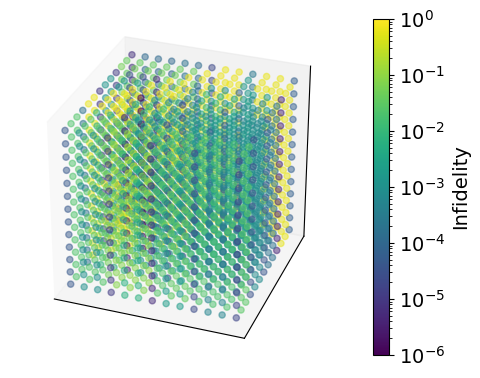

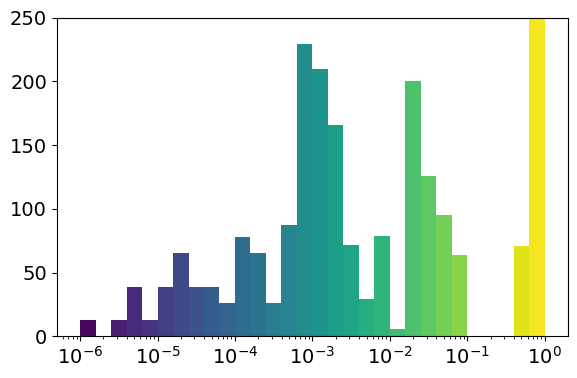

6270
1.23e-01 +- 2.47e-01, 7.12e-01
-8.0


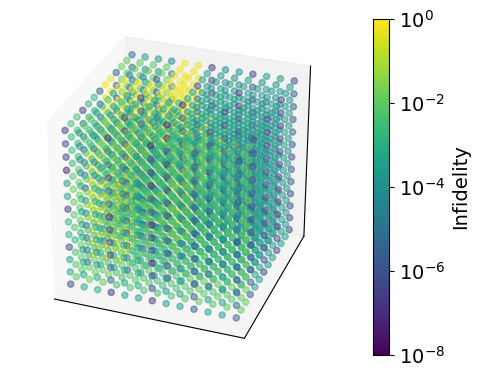

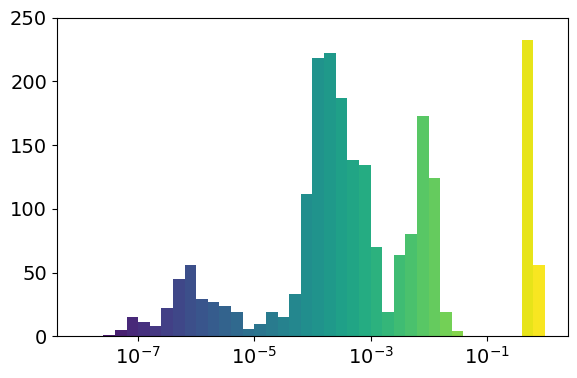

11068
8.21e-02 +- 2.05e-01, 6.75e-01
-8.0


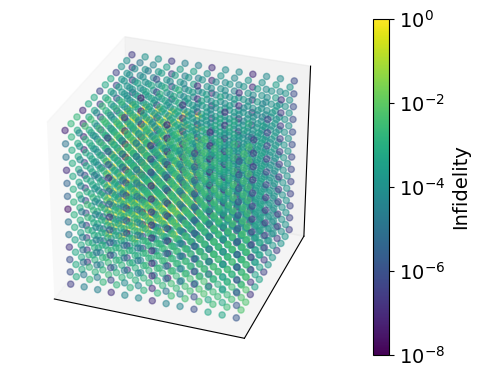

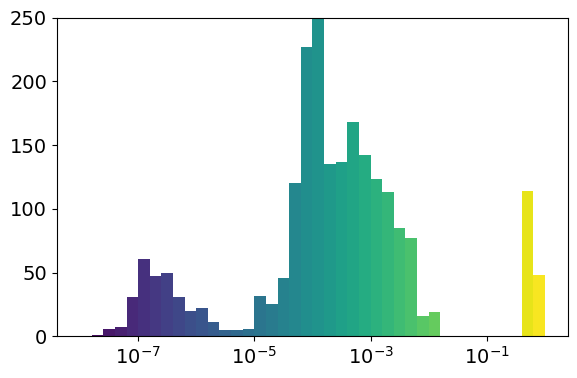

15167
4.63e-02 +- 1.61e-01, 6.66e-01
-9.0


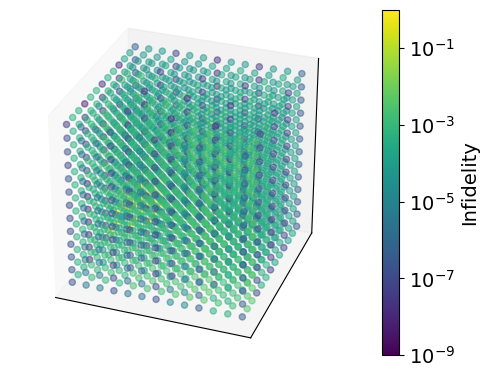

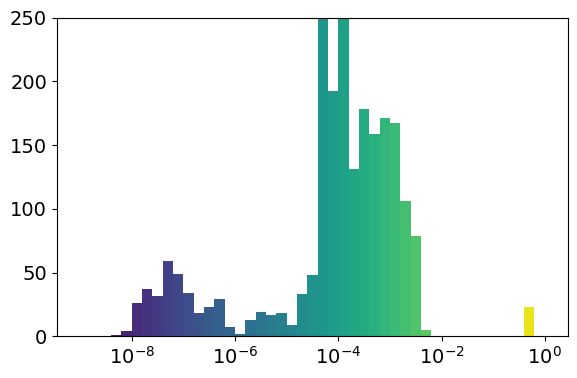

18406
6.62e-03 +- 5.97e-02, 6.06e-01
-9.0


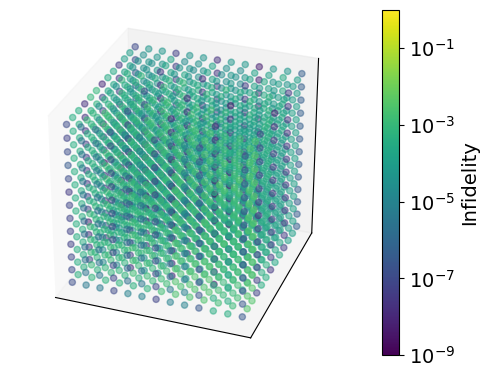

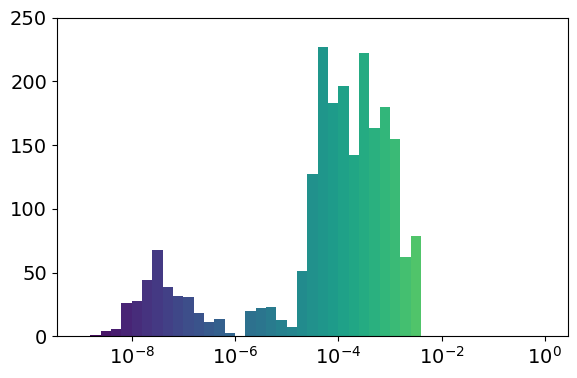

21377
4.19e-04 +- 6.64e-04, 3.90e-03
-9.0


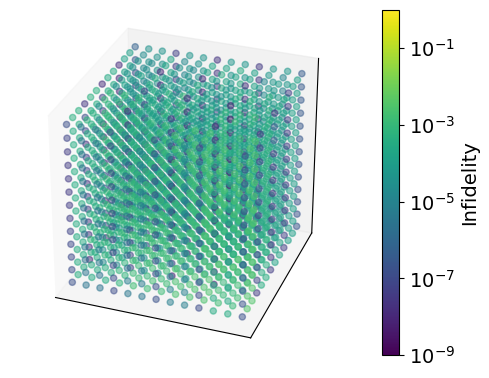

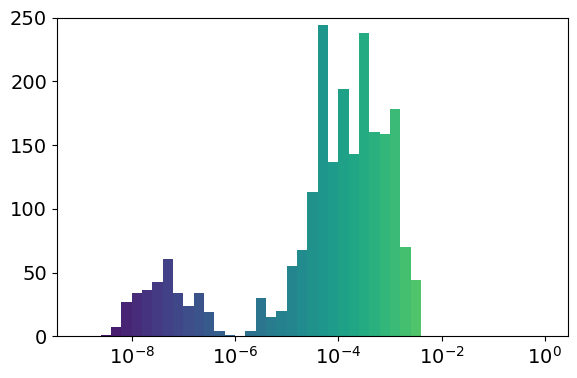

24211
3.92e-04 +- 6.13e-04, 3.34e-03


In [5]:
font = {
    'family' : 'sans',
    'weight' : 'normal',
    'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

cum_iters = 0
for i,result in enumerate(result_dicts):
    plotter.plot_interpolation(result['test_points'], result['infids'], result['train_points'], result['simplices'], aspect=(1,1,1), hist_ylim=(0,250), draw_simplices=False, savepath=f'interpolation_results/cartan/{i}_')
    cum_iters += np.sum(result['n_iters'])
    print(cum_iters)
    print(f"{np.mean(result['infids']):0.2e} +- {np.std(result['infids']):0.2e}, {np.max(result['infids']):0.2e}")